# **TAREA 2 DE APRENDIZAJE AUTOMÁTICO**
## Universidad de Montevideo
## Ing. en Infórmatica - Sem 2, 2021
### Docente: Sebastián Garcia


## Grupo 2:
* Bruno Costanzo
* Renzo D'Ambrosio

##PARTE 1

Efectúe un profundo EDA de los datasets entregados por el área de Operaciones Crediticias. Documente todas las observaciones que haga de los datos.

In [ ]:
# Importamos paquetes necesarios
import sklearn as s
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
# Cargamos los 2 datasets

df_contactos = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/DatasetContactos.csv', sep=';')
df_clientes = pd.read_csv('https://raw.githubusercontent.com/rdambrosioz/aa_2021/main/DatasetTrxs.csv')

### CONTACTOS

A continuación realizamos un analisis del dataset de los contactos.

In [ ]:
df_contactos

CUST_ID            PHONE  CONTACTS
0     C10001  +1 314-407-7397         2
1     C10002  +1 203-790-2151         2
2     C10003  +1 225-959-8209         3
3     C10004  +1 315-394-6219         0
4     C10005  +1 207-523-0823         0
...      ...              ...       ...
8945  C19186  +1 236-768-6180         2
8946  C19187  +1 204-218-2544         1
8947  C19188  +1 506-873-0543         1
8948  C19189  +1 204-517-7879         3
8949  C19190  +1 343-965-6104         1

[8950 rows x 3 columns]

(count    8950.000000
 mean        1.485587
 std         1.112995
 min         0.000000
 25%         0.000000
 50%         1.000000
 75%         2.000000
 max         3.000000
 Name: CONTACTS, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc39b293390>)

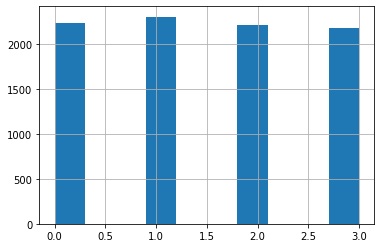

In [ ]:
df_contactos['CONTACTS'].describe(), df_contactos['CONTACTS'].hist()

Hacemos más enfacis en el atrbuto de 'CONTACTS' que nos brinda la información de cuantas llamadas recibió un usuario en los últimos 60 días, dato muy importante para seleccionar a quien contactar para ofrecer el nuevo producto del banco. 

In [ ]:
len(df_contactos['CUST_ID'].unique()), len(df_contactos['CUST_ID'])

(8950, 8950)

In [ ]:
df_contactos.isnull().describe()

CUST_ID  PHONE CONTACTS
count     8950   8950     8950
unique       1      1        1
top      False  False    False
freq      8950   8950     8950

In [ ]:
df_contactos.where(df_contactos['CONTACTS'] < 2).dropna()

CUST_ID            PHONE  CONTACTS
3     C10004  +1 315-394-6219       0.0
4     C10005  +1 207-523-0823       0.0
5     C10006  +1 207-765-8240       0.0
6     C10007  +1 507-257-4838       1.0
7     C10008  +1 279-798-5201       0.0
...      ...              ...       ...
8935  C19176  +1 418-510-4195       0.0
8941  C19182  +1 204-930-6179       0.0
8946  C19187  +1 204-218-2544       1.0
8947  C19188  +1 506-873-0543       1.0
8949  C19190  +1 343-965-6104       1.0

[4549 rows x 3 columns]

In [ ]:
len(df_contactos.where(df_contactos['CONTACTS'] >= 2).dropna())

4401

En esta parte se estudio en primer lugar si había valores nulos, lo cual no ocurre y luego removimos los usuarios cuyo valor en el atributo CONTACTS sea mayor o igual a 2 ya que a estos no los podemos contactar. Hay 4401 clientes los cuales no podemos contactar.

### CLIENTES

A continuación realizamos un analisis del dataset de los clientes.

In [ ]:
df_clientes

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0     C10001    40.900749  ...          0.000000      12
1     C10002  3202.467416  ...          0.222222      12
2     C10003  2495.148862  ...          0.000000      12
3     C10004  1666.670542  ...          0.000000      12
4     C10005   817.714335  ...          0.000000      12
...      ...          ...  ...               ...     ...
8945  C19186    28.493517  ...          0.500000       6
8946  C19187    19.183215  ...          0.000000       6
8947  C19188    23.398673  ...          0.250000       6
8948  C19189    13.457564  ...          0.250000       6
8949  C19190   372.708075  ...          0.000000       6

[8950 rows x 18 columns]

In [ ]:
df_clientes.describe()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

In [ ]:
df_clientes.isnull().describe()

CUST_ID BALANCE  ... PRC_FULL_PAYMENT TENURE
count     8950    8950  ...             8950   8950
unique       1       1  ...                1      1
top      False   False  ...            False  False
freq      8950    8950  ...             8950   8950

[4 rows x 18 columns]

In [ ]:
df_clientes.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vemos que los atributos CREDIT_LIMIT y MINIMUM_PAYMENTS tienen valores en nulo, hay que tomar una decisión sobre que hacer con esas instancias.

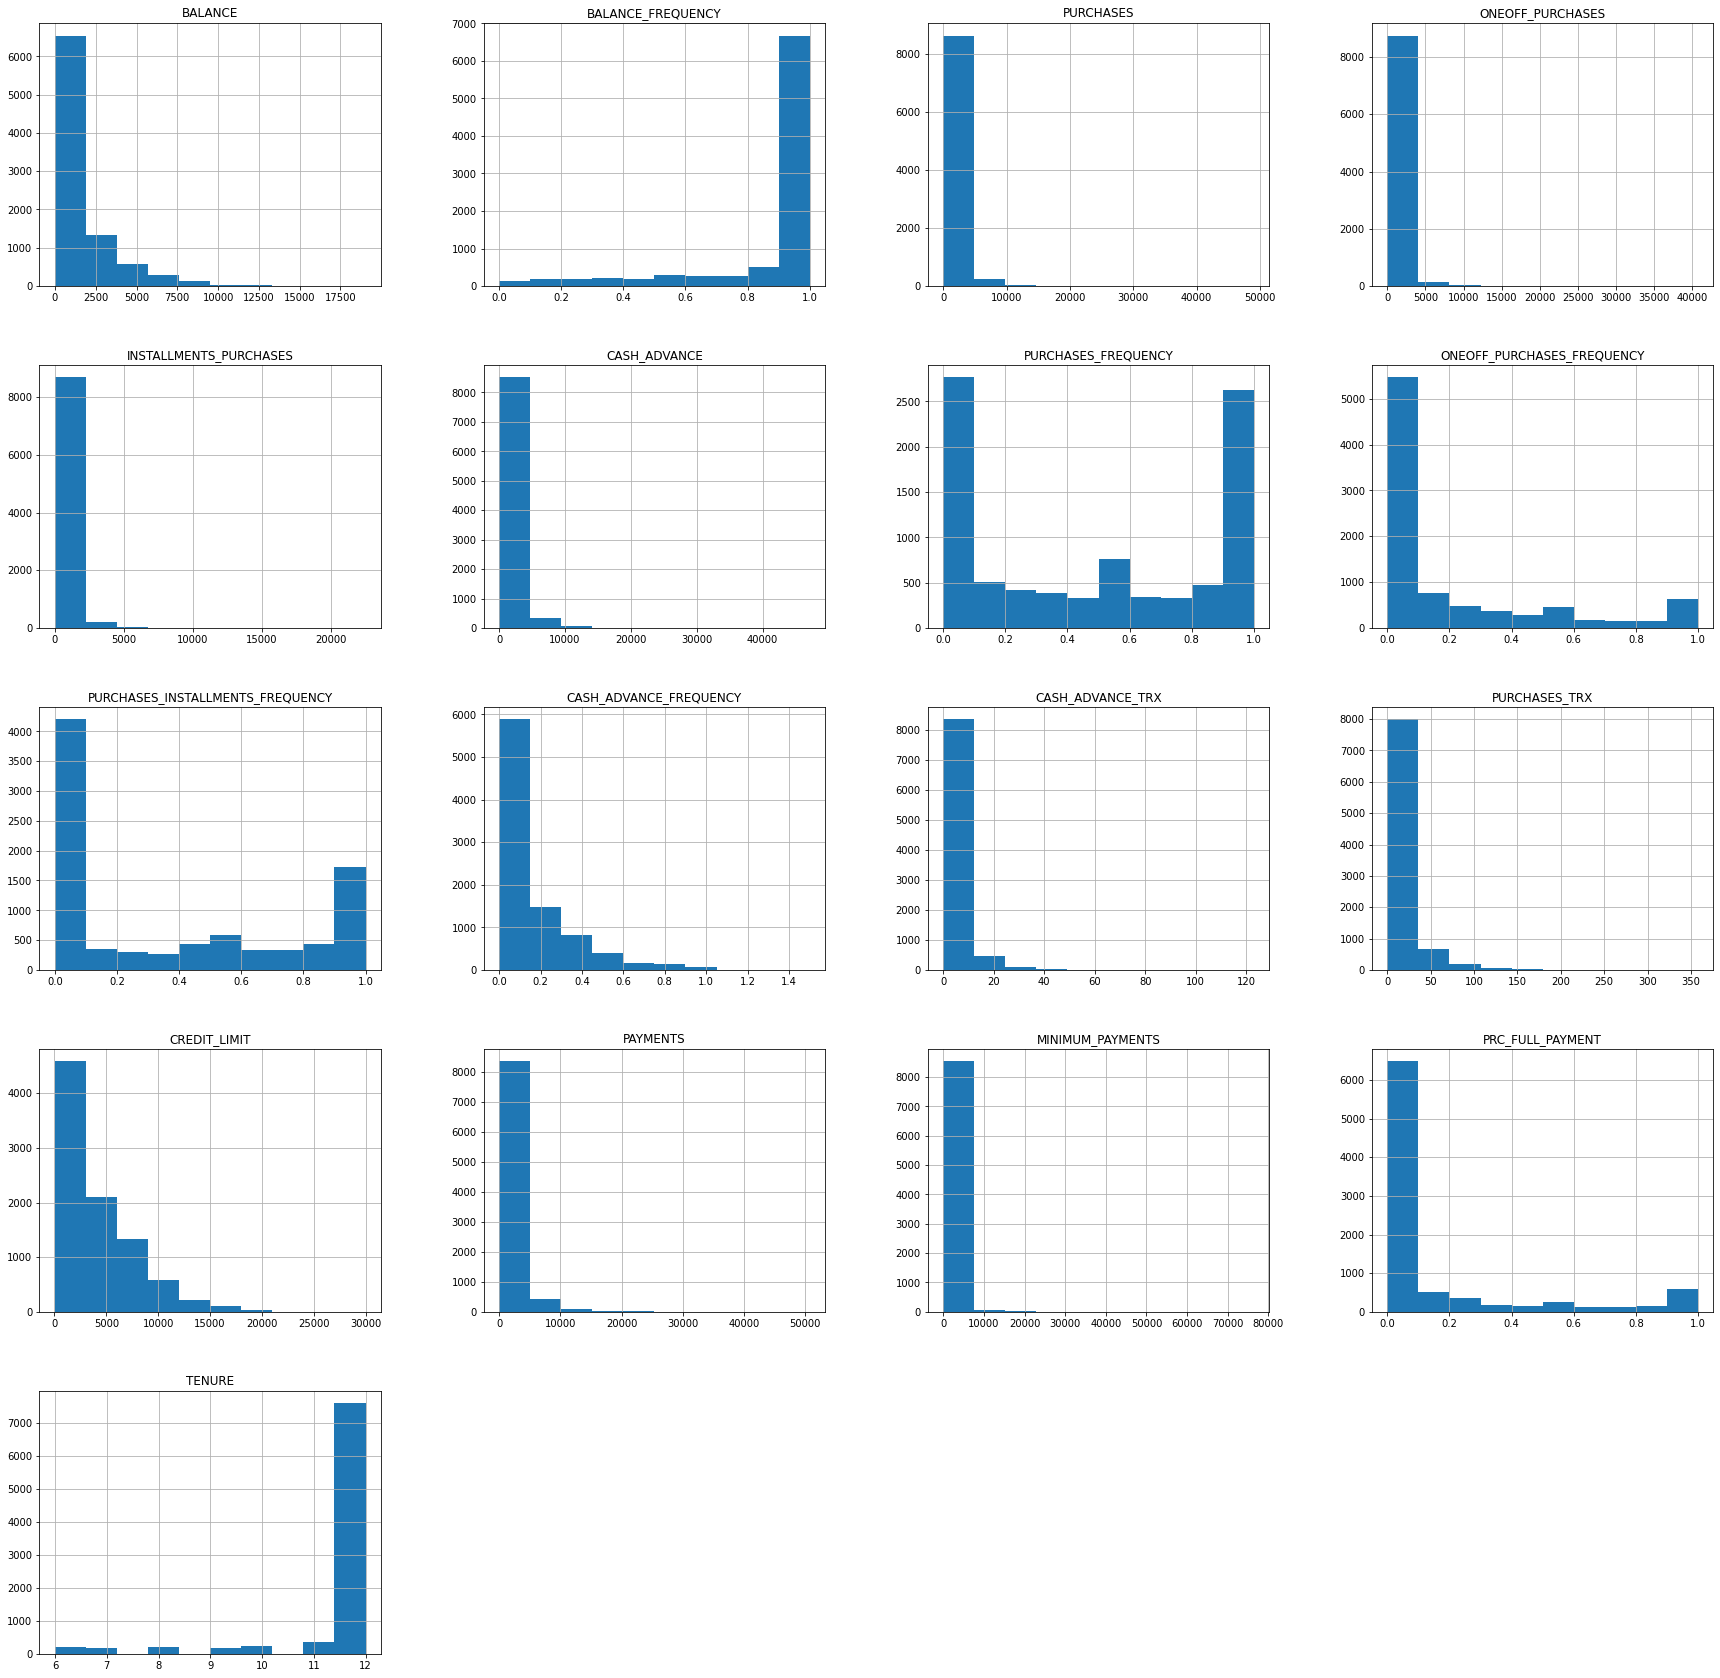

In [ ]:
df_clientes.hist(figsize=(30,30))
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


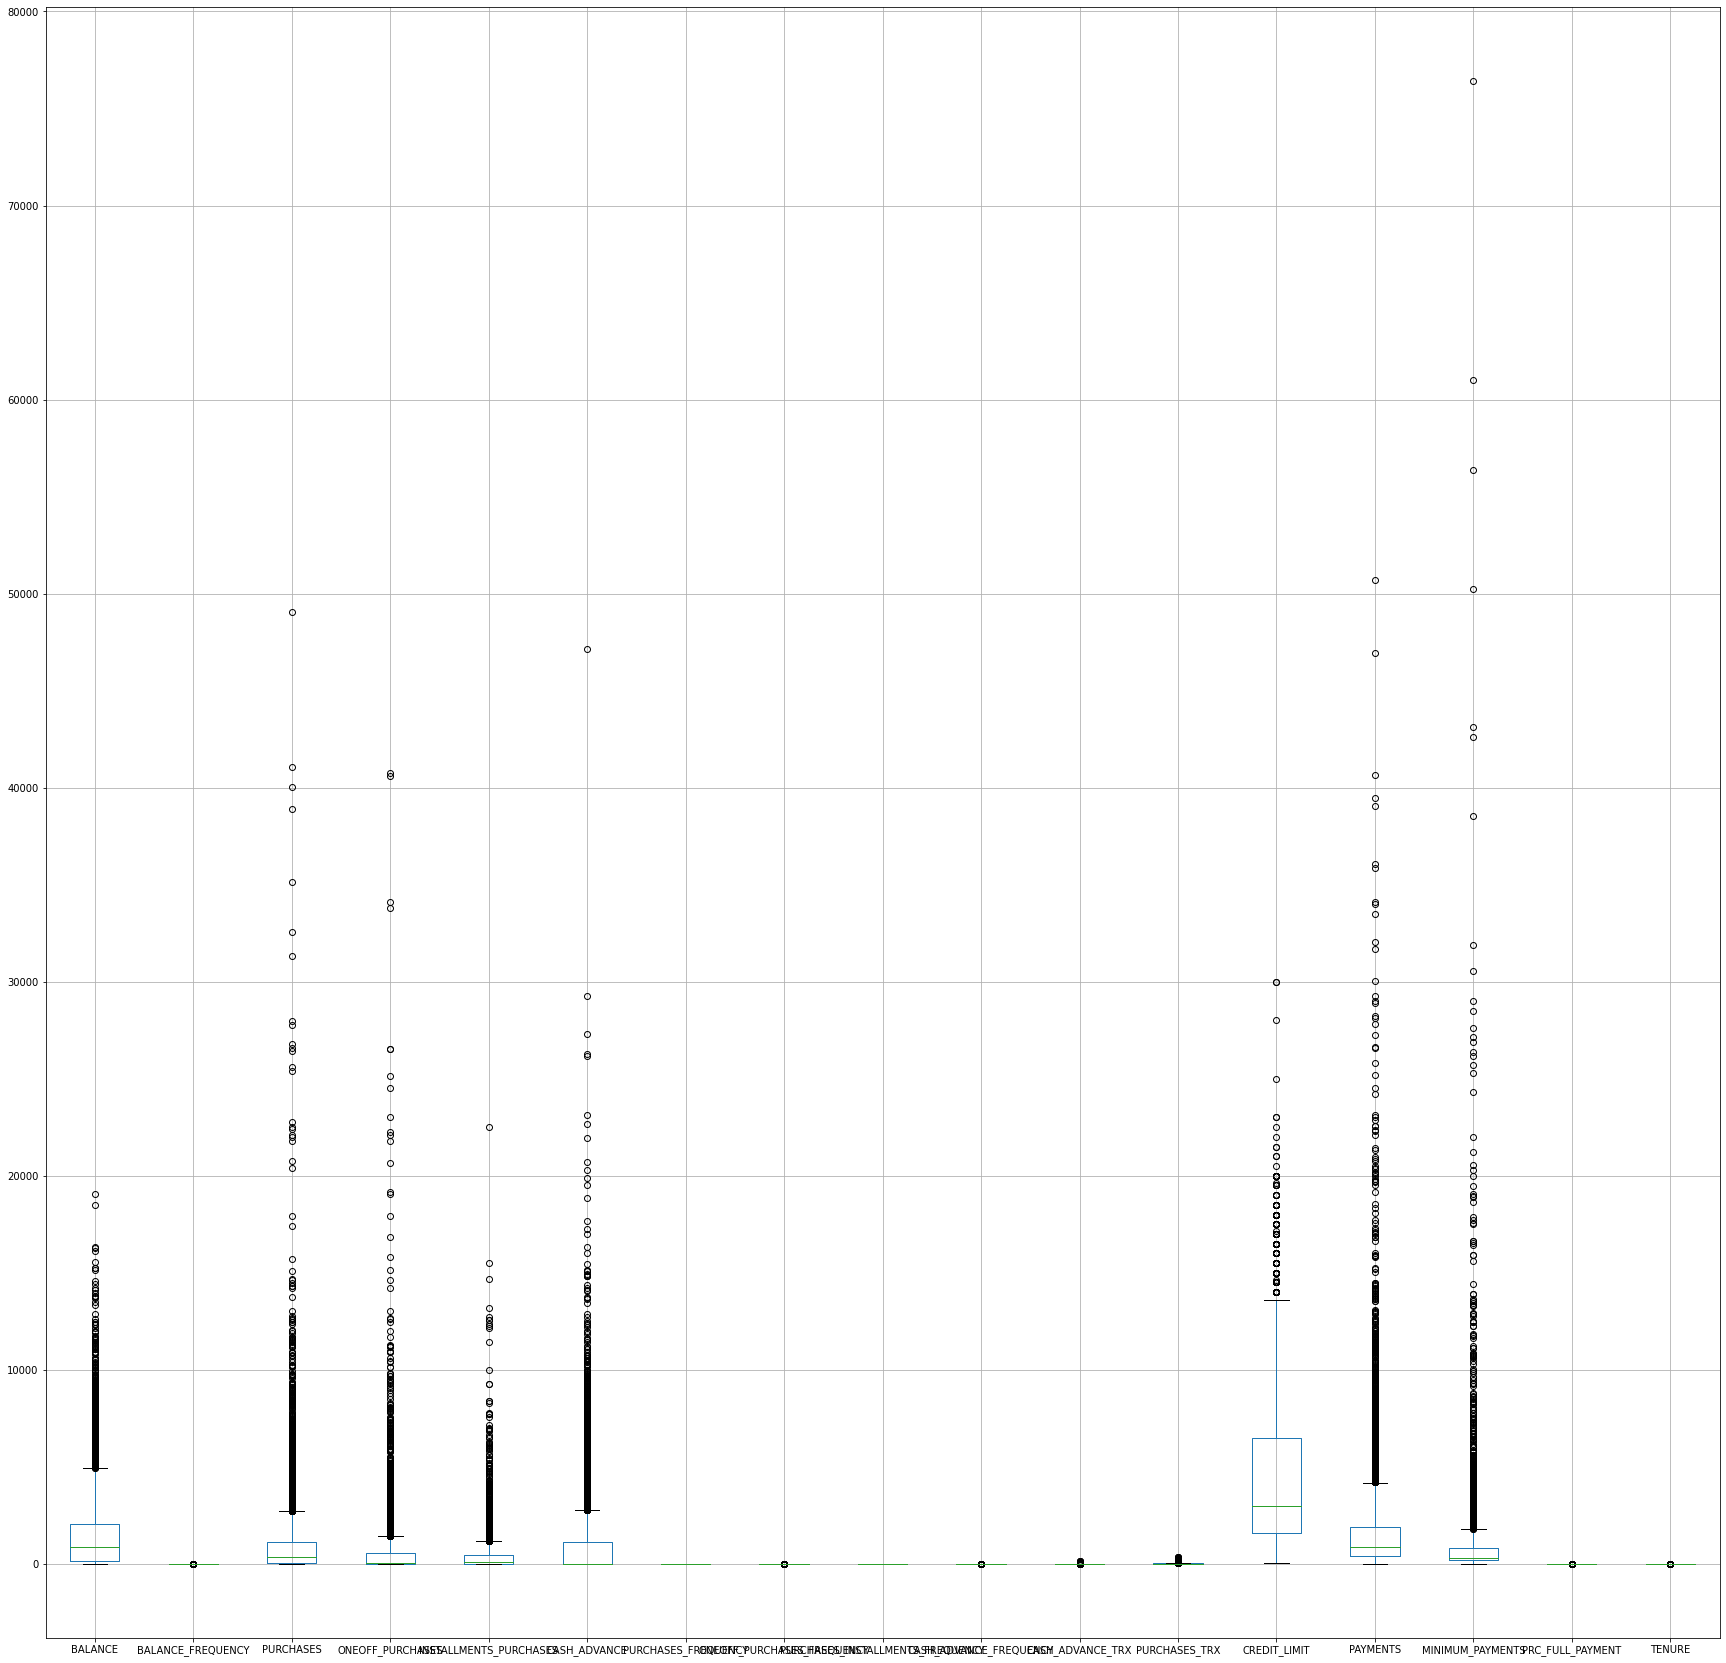

In [ ]:
df_clientes.boxplot(figsize=(30,30))
plt.show()

In [ ]:
df_clientes.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

17


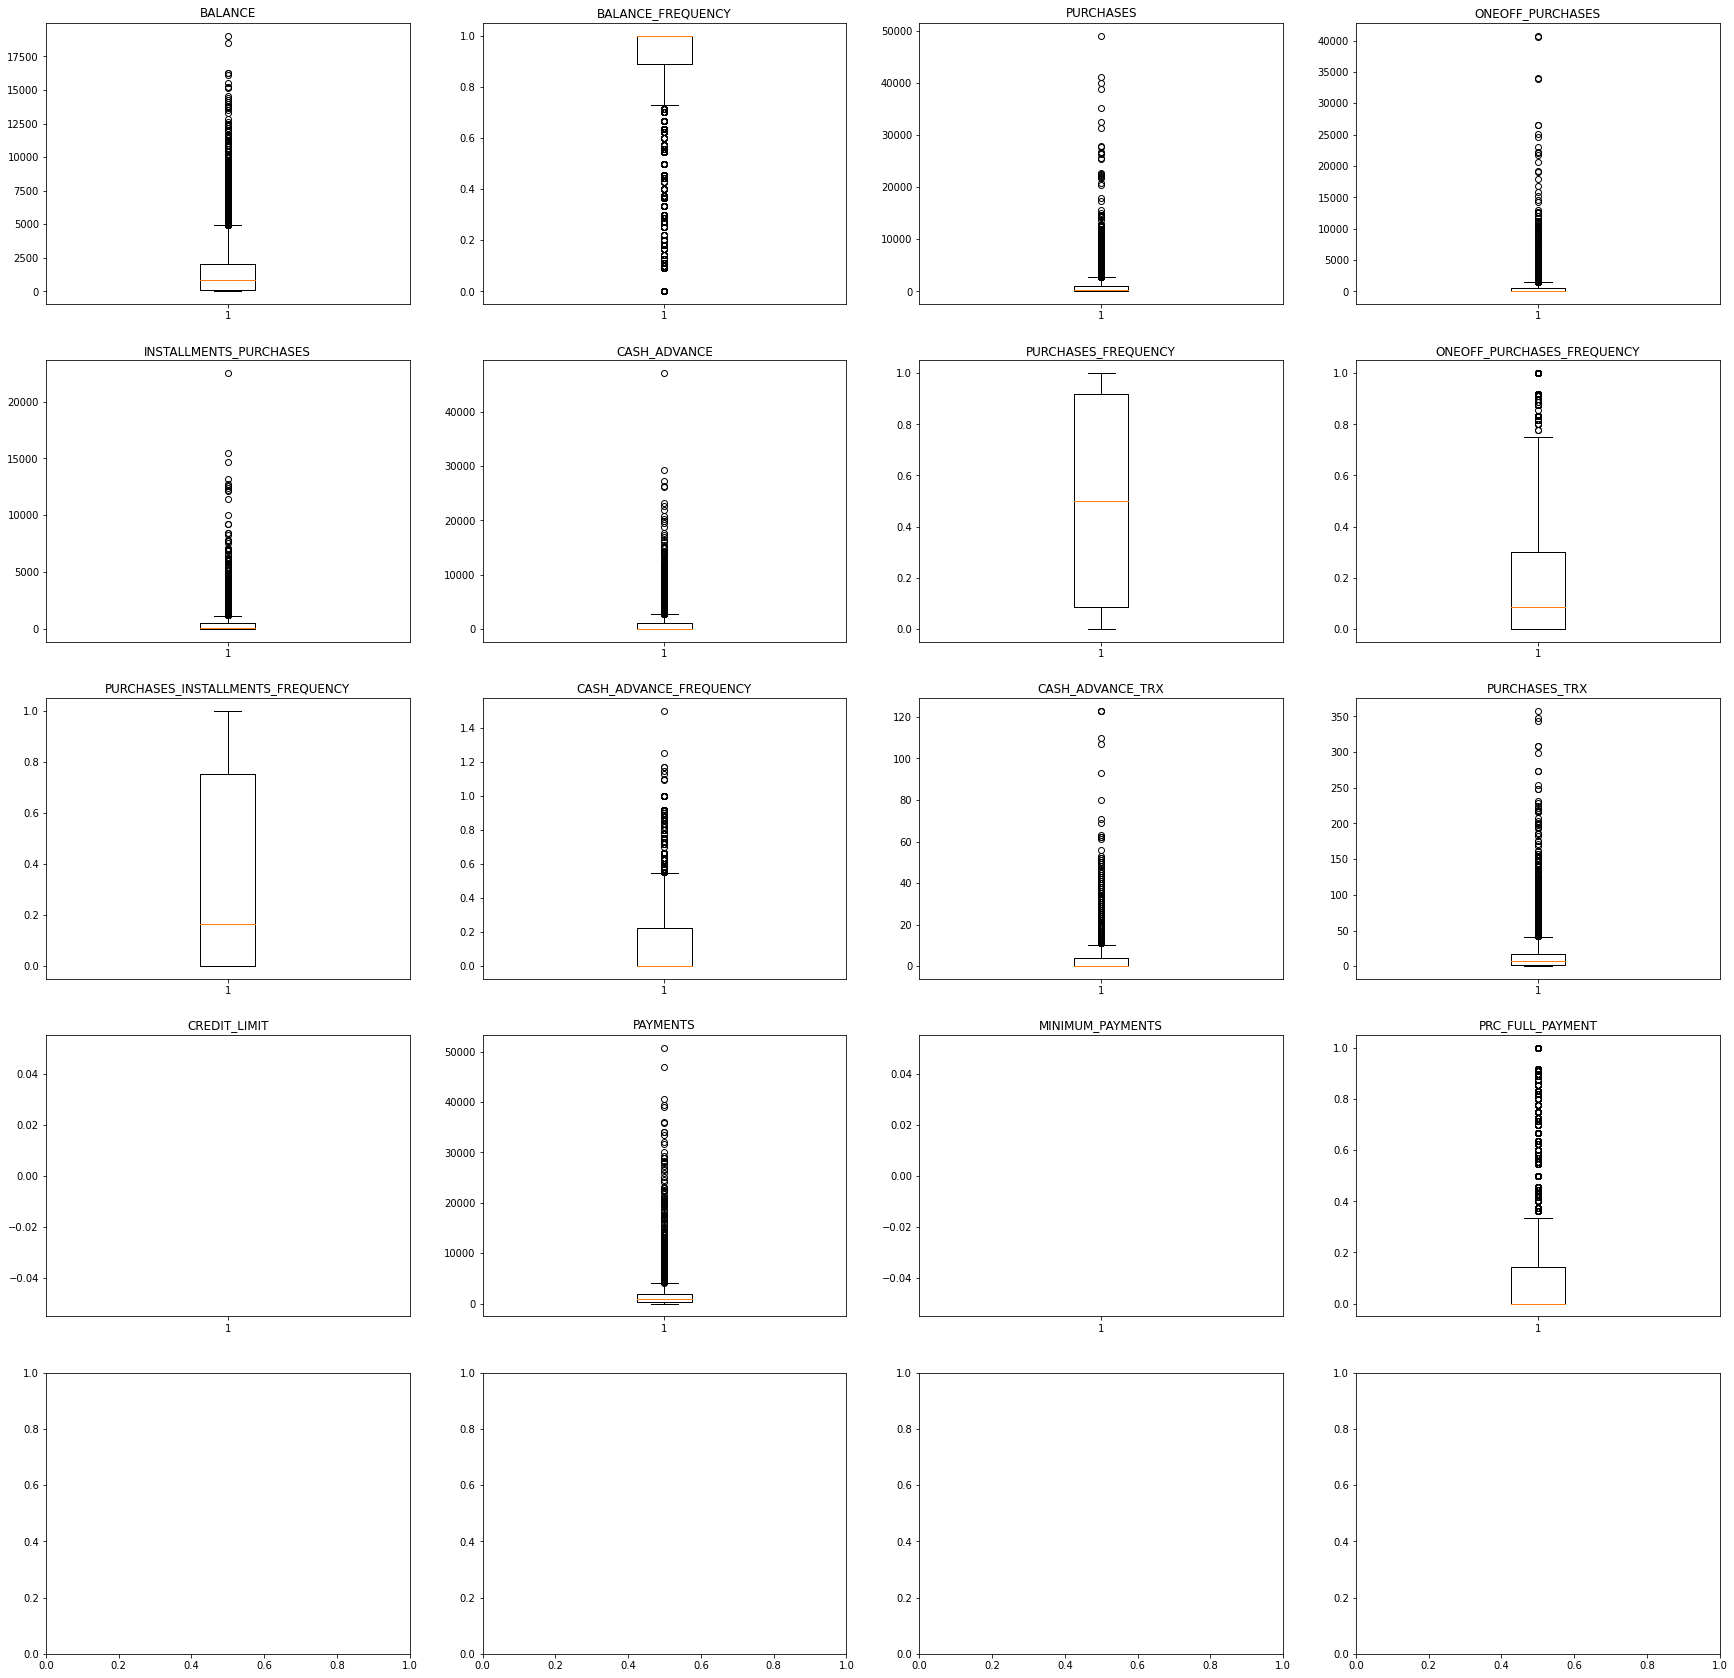

In [ ]:
features = df_clientes.columns.values[1:]
print(len(features))
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(4):
  for a in ax[j]:
    a.boxplot(df_clientes[features[i]])
    a.set_title(features[i])
    i += 1
    if i == 17:
      break

In [ ]:
df_clientes[['PAYMENTS', 'MINIMUM_PAYMENTS']].corr(method='pearson'), df_clientes[['PRC_FULL_PAYMENT', 'MINIMUM_PAYMENTS']].corr(method='pearson')

(                  PAYMENTS  MINIMUM_PAYMENTS
 PAYMENTS          1.000000          0.126651
 MINIMUM_PAYMENTS  0.126651          1.000000,
                   PRC_FULL_PAYMENT  MINIMUM_PAYMENTS
 PRC_FULL_PAYMENT          1.000000         -0.140379
 MINIMUM_PAYMENTS         -0.140379          1.000000)

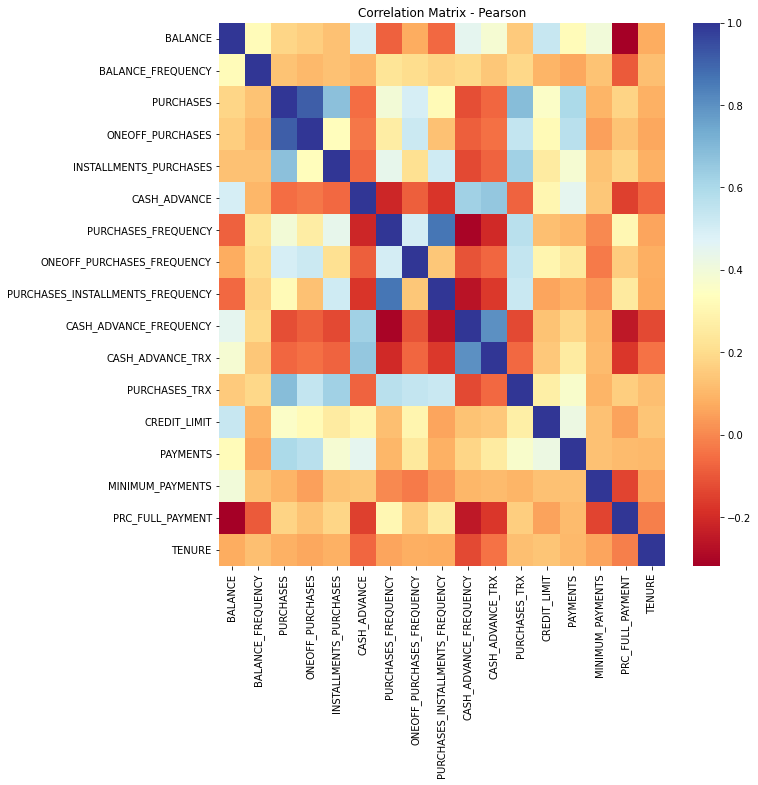

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clientes.corr(method='pearson'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Pearson')
plt.show()

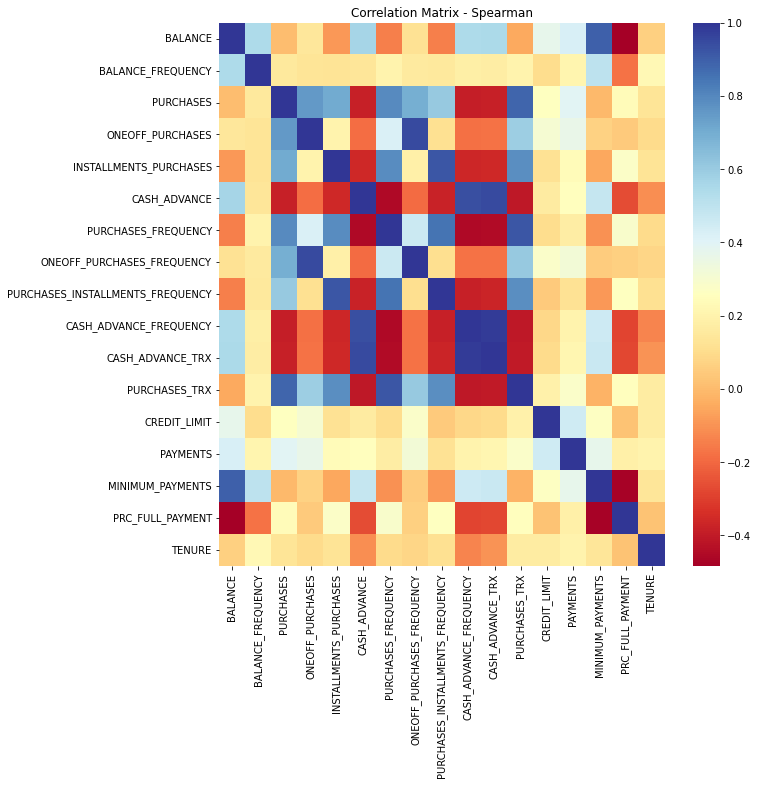

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df_clientes.corr(method='spearman'), cbar=True, cmap='RdYlBu')
plt.title('Correlation Matrix - Spearman')
plt.show()

Aquí se presentan graficamente las matrices de correlacion de los feature. En particular se utilizan dos metricas de correlación distintas (Pearson y Spearmann)

A continuacion evaluamos la distribucion de la variable 'MINIMUM PAYMENTS' por ser una que genera problemas por tener muchos valores nulos

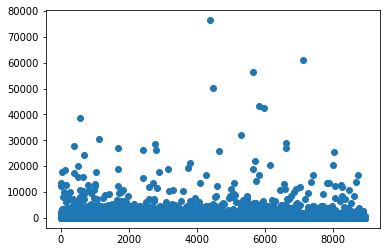

In [ ]:
plt.scatter([i for i in range(len(df_clientes))], df_clientes['MINIMUM_PAYMENTS'])

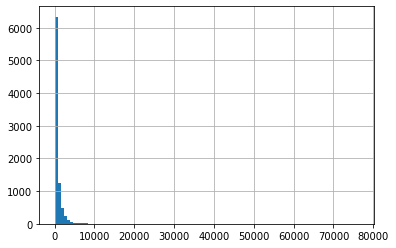

In [ ]:
df_clientes['MINIMUM_PAYMENTS'].hist(bins=100)

In [ ]:
len(df_clientes['MINIMUM_PAYMENTS'].where(df_clientes['MINIMUM_PAYMENTS'] <= 0.15).dropna())

5

## PARTE 2

Haga la limpieza necesaria de los datasets, considerando datos nulos y outliers. Justifique cada una de las decisiones tomadas.

In [ ]:
df_clientes = df_clientes.where(df_clientes['CREDIT_LIMIT'].notna()).dropna(how='all')

In [ ]:
df_clientes = df_clientes.dropna()

Tomamos la decisión de eliminar las instancias con valores nulos ya que las mismas representan menos de un 5% de las instancias del dataset por lo que no iban a ser significativas en el análisis del mismo. 

Ademas, dada la distribución de la variabe, no parecia la mejor decisión tomar simplemente la mediana o media como placeholder

In [ ]:
z_scores = sp.stats.zscore(df_clientes.drop(axis=1, labels='CUST_ID'))


abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_clientes_otliers_free = df_clientes[filtered_entries]

17


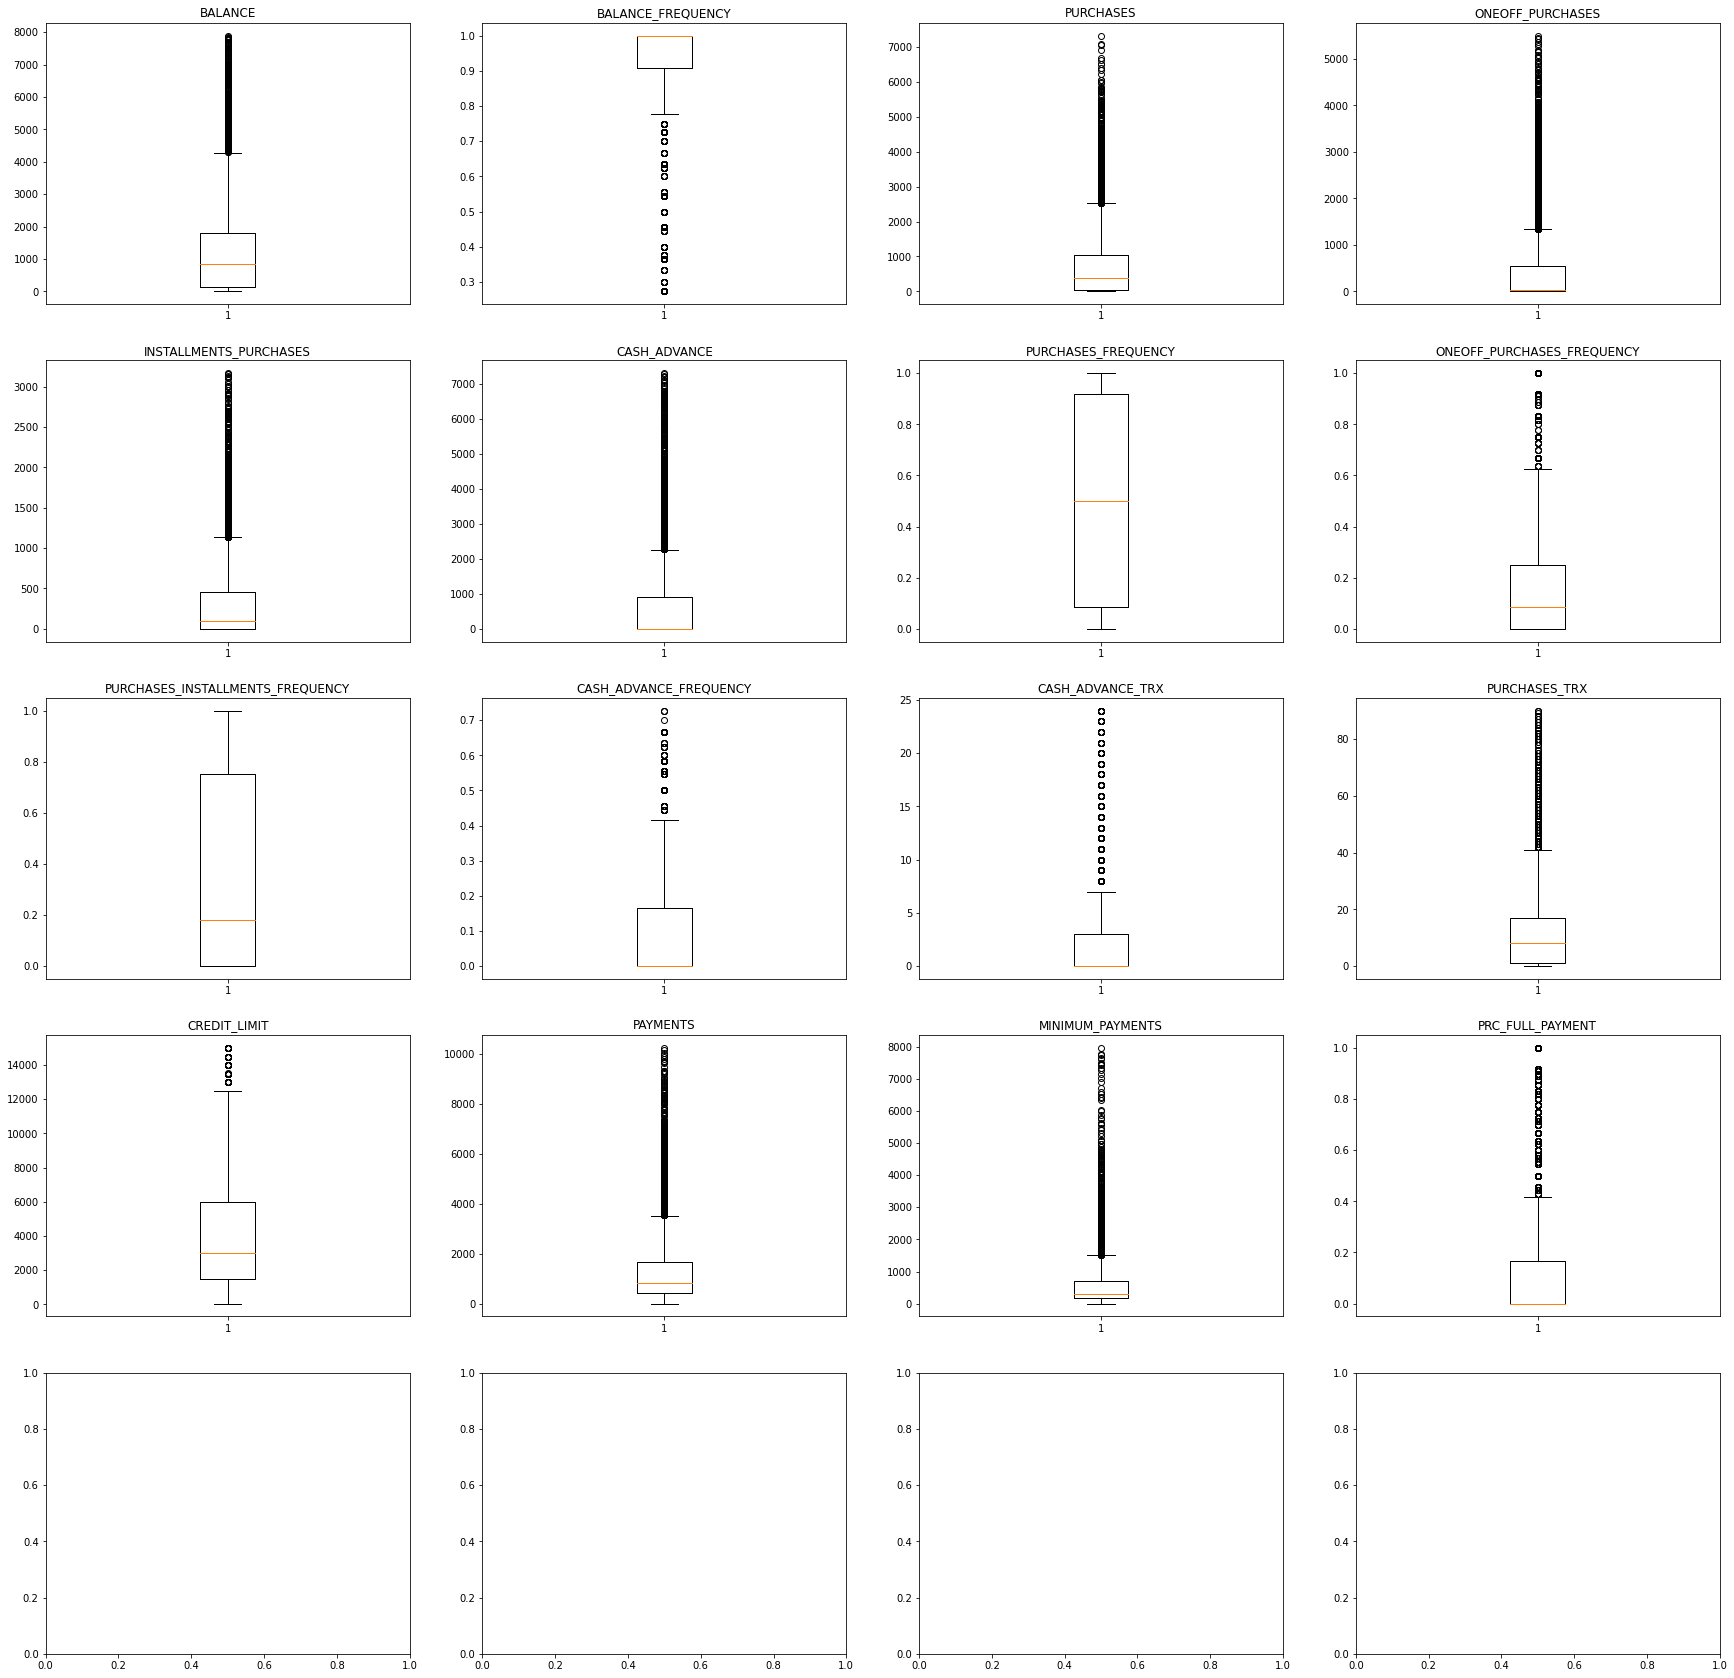

In [ ]:
features = df_clientes_otliers_free.columns.values[1:]
print(len(features))
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(4):
  for a in ax[j]:
    a.boxplot(df_clientes_otliers_free[features[i]])
    a.set_title(features[i])
    i += 1
    if i == 17:
      break

In [ ]:
len(df_clientes_otliers_free)

7190

Sobre los outliers evaluamos 2 posible caminos, en primer lugar eliminarlos ya que iban a ser datos que no aportan mucho ya que son instancias anormales que puede afectar a nuestros modelos. En segundo lugar evaluamos mantenerlos.

Es importante aclcarar que se consideraban outliers a aquellos datos que se alejaran por mas de 3 desviaciones estandar de la media.

Luego de ver y analisar las 2 posibilidades, al eliminar los outliers el modelo no mejoro mucho, fue casi igual, por lo que decidimos mantener los outliers. Ademas, eliminarlos significaba renunciar a una cantidad importante de clientes a los cuales les podía interesar los productos nuevos.

## PARTE 3

Utilizando el algoritmo k-means efectúe una clusterización del dataset entregado. Detecte aquellos clusters relevantes para el problema, describiéndolos en términos de negocio. Debe de graficar el resultado de la clusterización, se recomienda el uso de PCA para bajar la dimensionalidad de los datos.

Utilice las técnicas que considere necesarias para determinar la cantidad óptima de clusters, justificando claramente las decisiones tomadas.

In [ ]:
df_clientes_cid = df_clientes
df_clientes = df_clientes.drop(axis=1, labels='CUST_ID')
data = df_clientes.values 
data_of = df_clientes_otliers_free.drop(axis=1, labels='CUST_ID').values

### Descomposición PCA

In [ ]:
components = 17
pca = PCA(n_components=components)
pca.fit(data)
data_PCA = pca.transform(data)

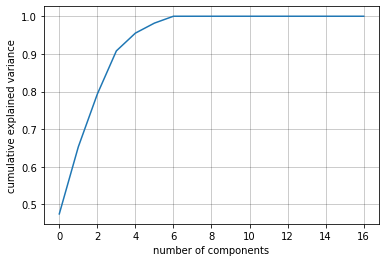

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

In [ ]:
expl = pca.explained_variance_ratio_
print('Primeros 6 PCA:',sum(expl[0:6]))

Primeros 6 PCA: 0.9817614502028874


Se busca la cantida de vectores mas optima para realizar PCA. Se considera que colapsar a un espacio de dimensionalidad 6 mantiene la gran mayoria de la información, facilitando la tarea al siguiente modelo al tener que trabajar con un espacio mas reducido

In [ ]:
components = 6
pca = PCA(n_components=components)
pca.fit(data)
data_PCA = pca.transform(data)

In [ ]:

scaler = MinMaxScaler()
data_PCA = scaler.fit_transform(data_PCA)

### Primer modelo de referencia

Realizamos un primer modelo naive como referencia para el desempeño de los modelos que logremos hacer al modificar los hiperparametros

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter=500) 
kmeans.fit(data_PCA)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

86.2702604251829

In [ ]:
df_data_PCA = pd.DataFrame(data_PCA)
cluster = []
for instance in data_PCA:

  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_data_PCA['Prediction'] = cluster

Vemos la distribucion de los cluster segun las distintas dimenciones de la descomposicion PCA

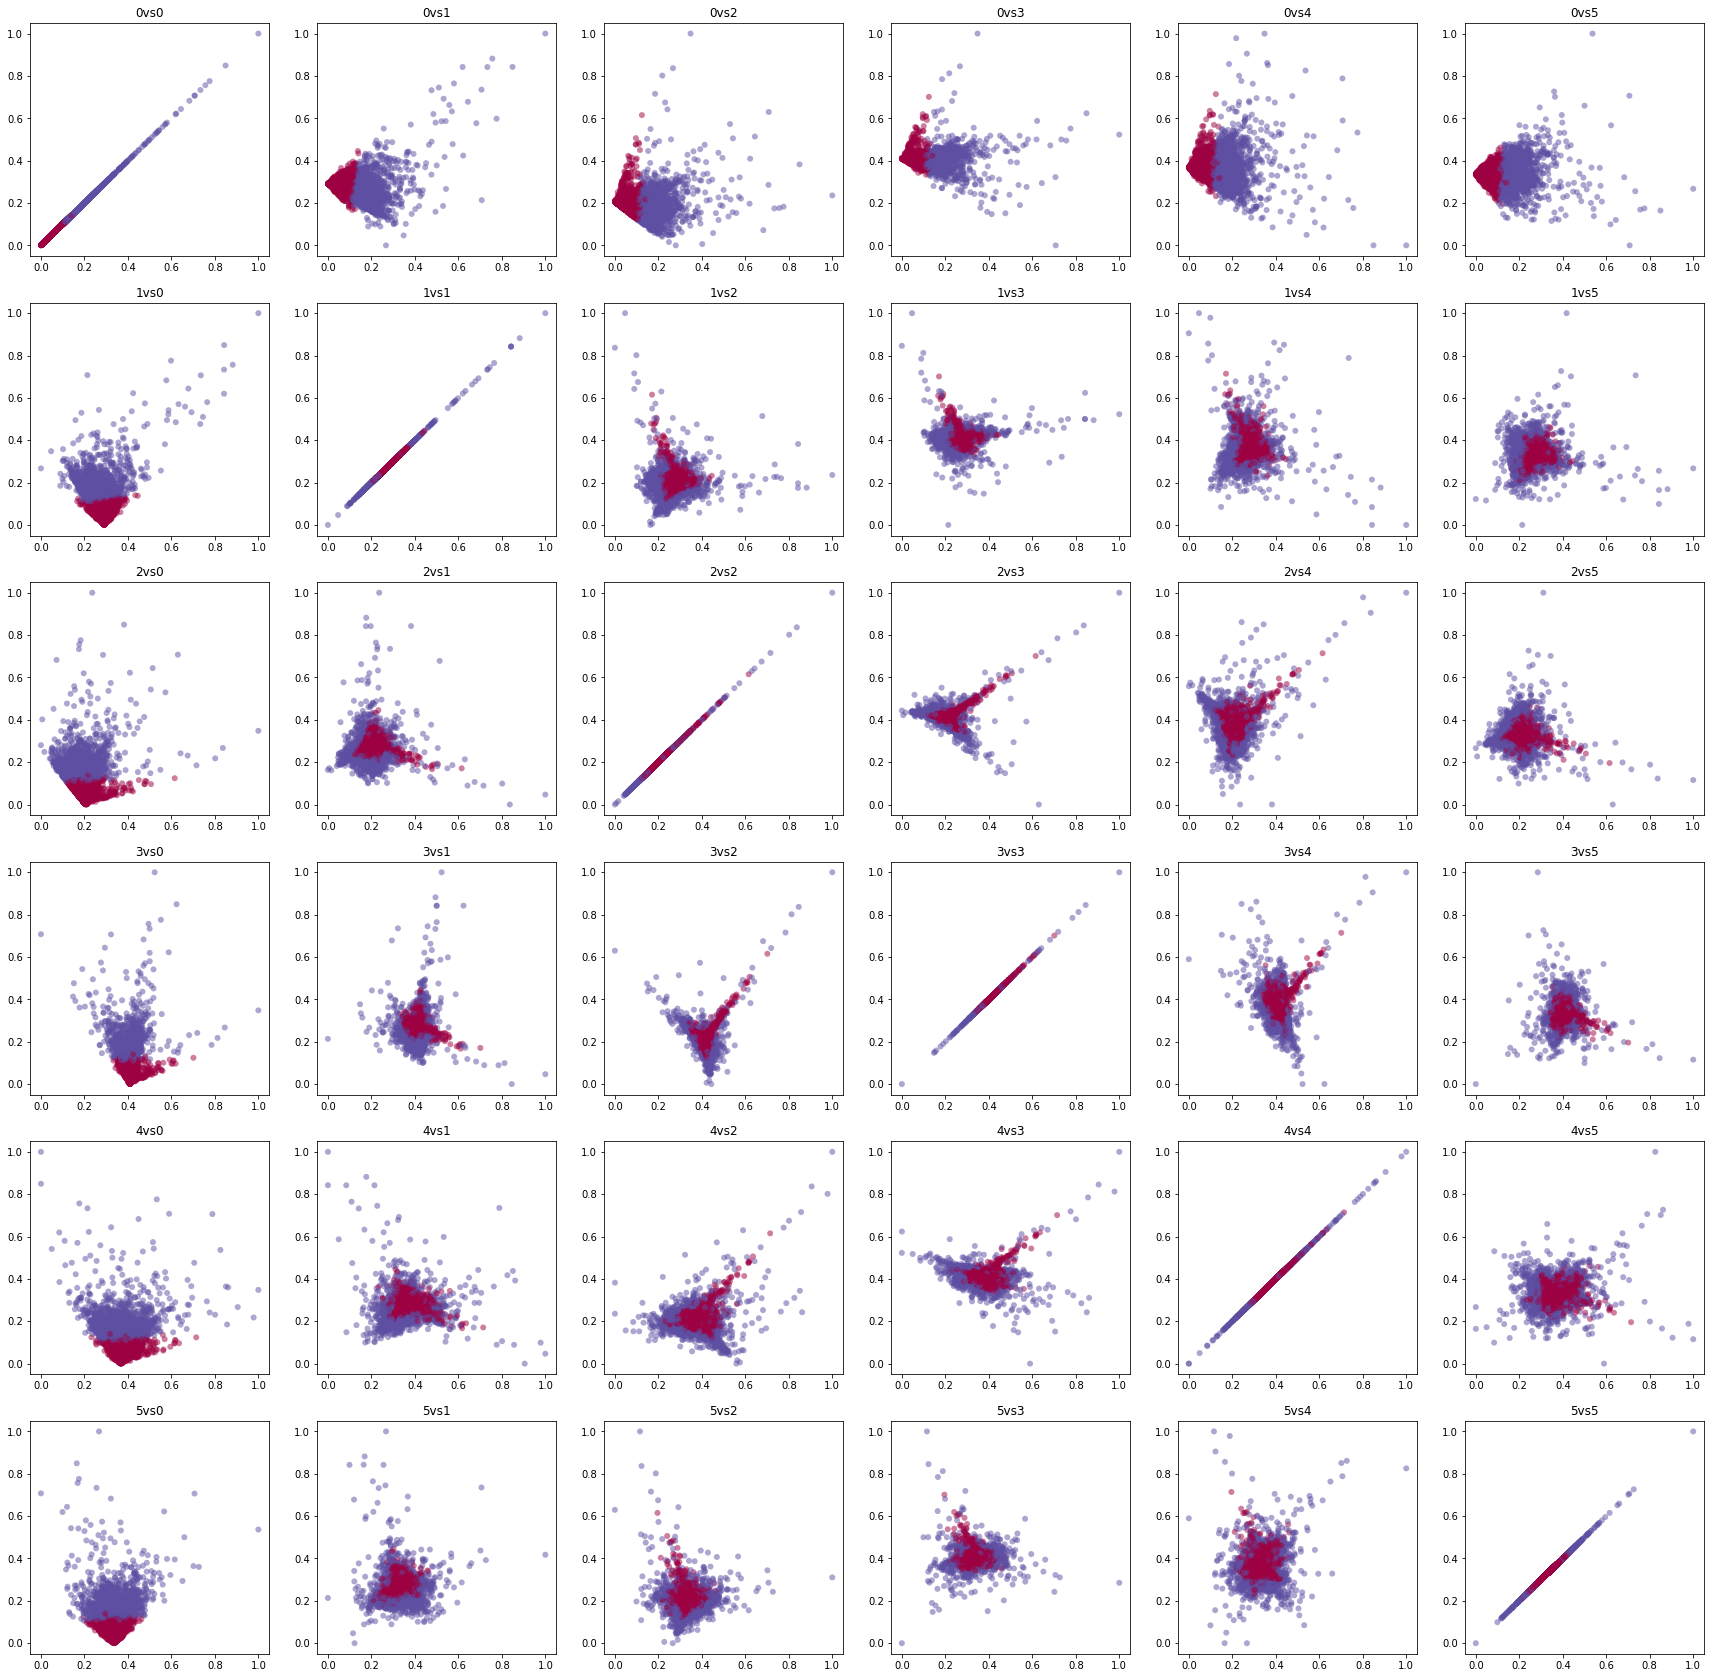

In [ ]:
features = [i for i in range(6)]

f, ax = plt.subplots(6,6, figsize=(30,30))

for j in range(6):
  for i in range(6):
    a = ax[j][i]
    a.scatter(df_data_PCA[j], df_data_PCA[i], c=df_data_PCA['Prediction'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
    a.set_title(str(j)+'vs'+str(i))



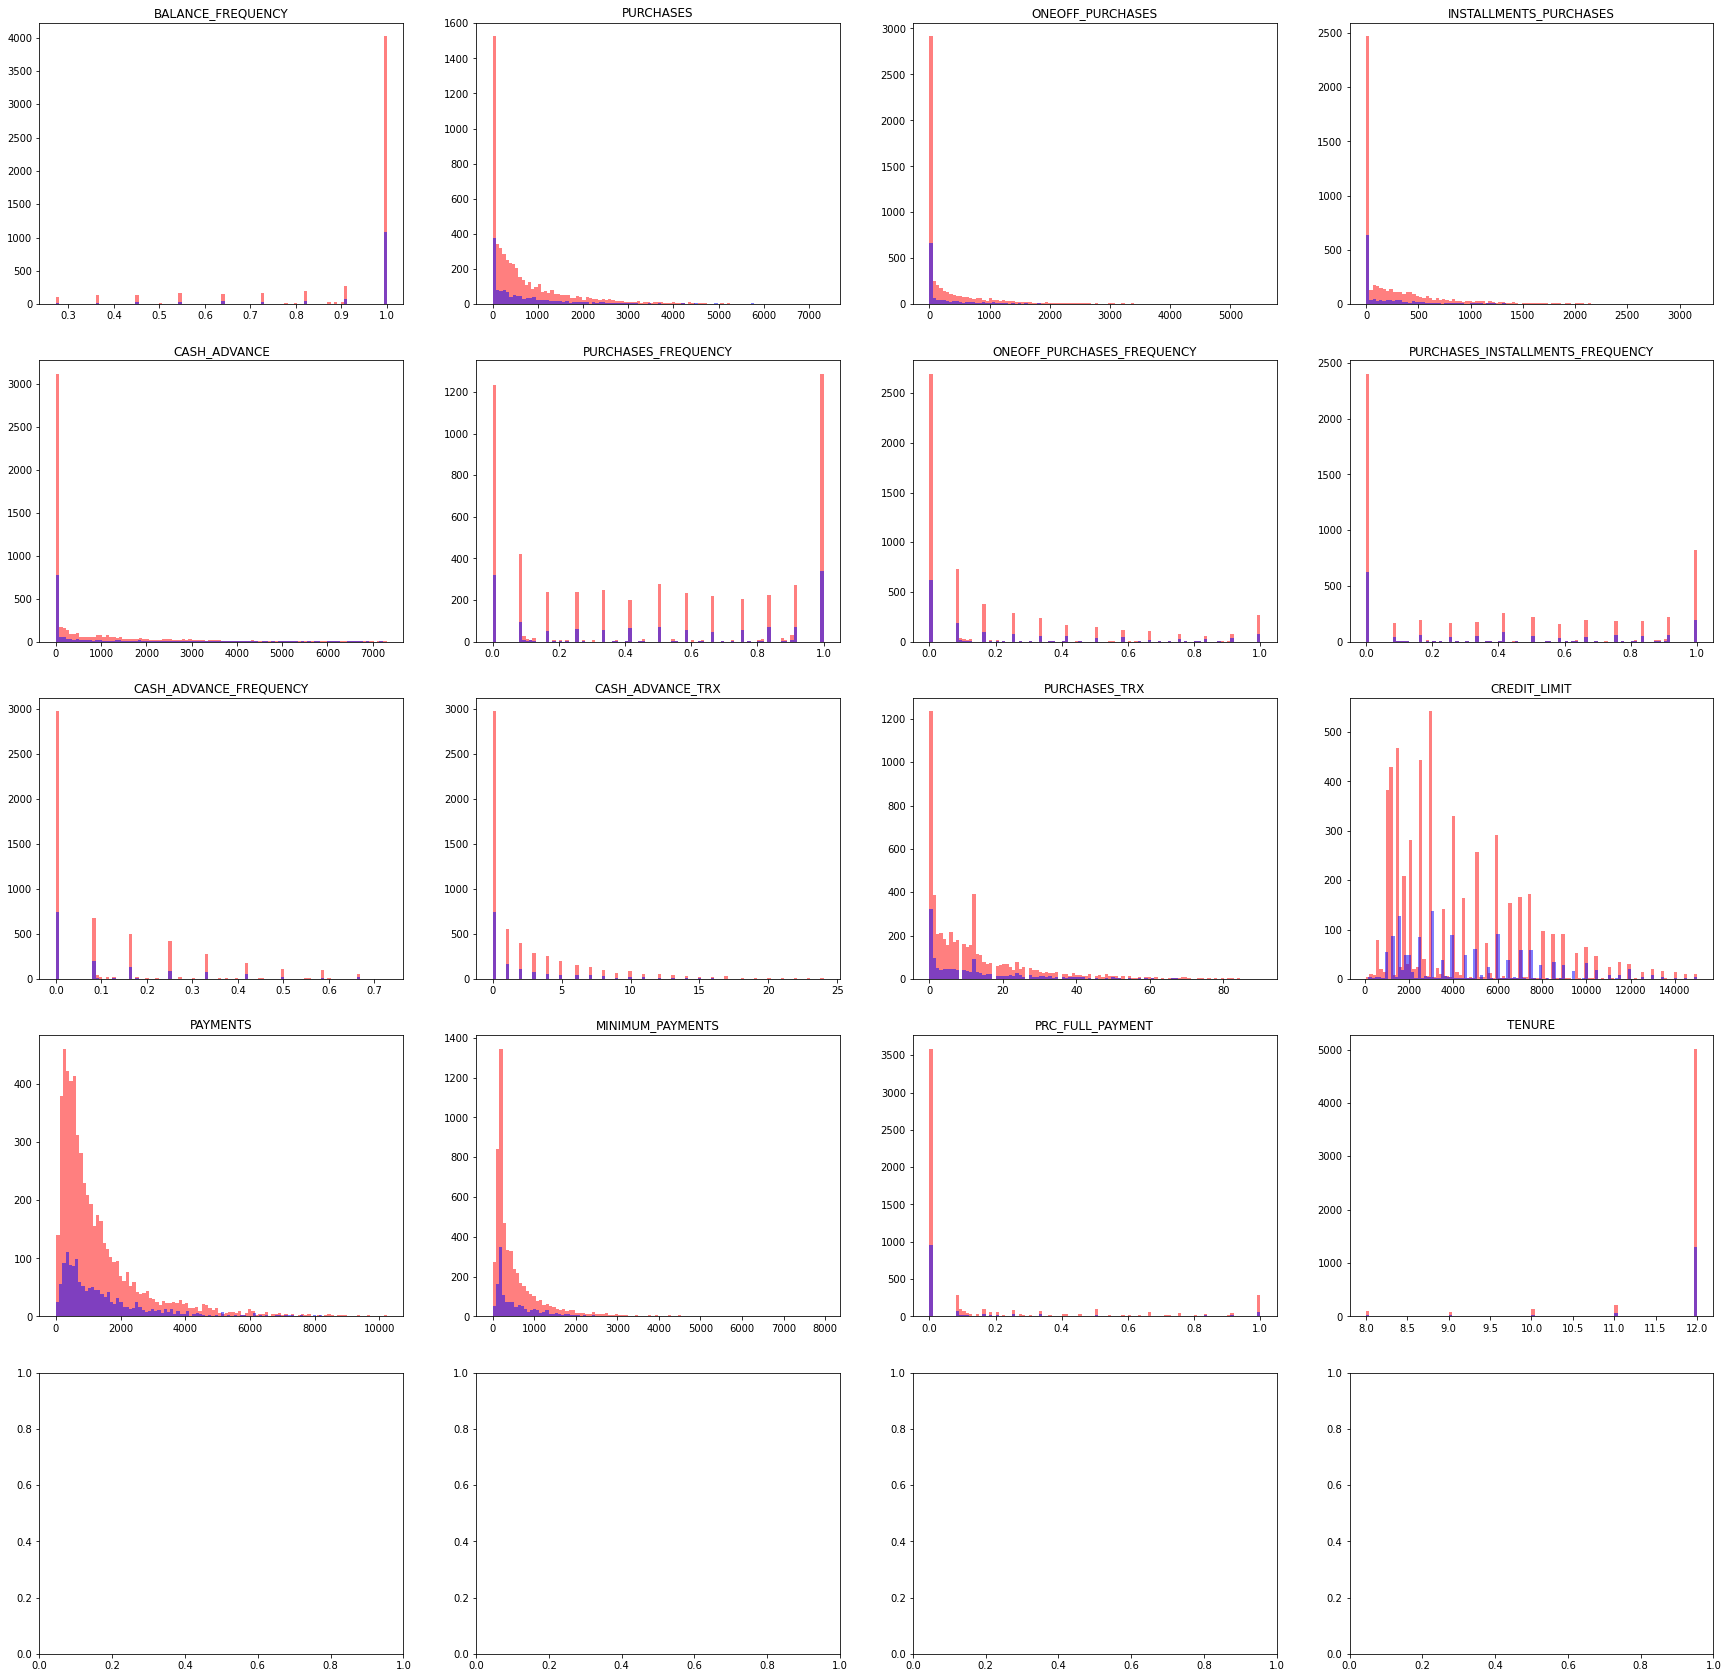

In [ ]:
features = df_clientes.columns.values[1:]
c = ['r','b']
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      for k in range(2):
        data = df_clientes_otliers_free[features[i]].where(df_data_PCA['Prediction'] == k)
        a.hist(data, alpha=0.5, color=c[k], label='{}' .format(k), bins=100)

      a.set_title(features[i])
      i += 1

### Mejoramos el modelo

In [ ]:
inertias = []
silhouettes = []
for i in range(3,20):
  kmeans = KMeans(n_clusters=i, max_iter=500, algorithm='elkan') 
  kmeans.fit(data_PCA)
  inertias += [kmeans.inertia_]
  silhouettes += [silhouette_score(data_PCA,kmeans.labels_)]

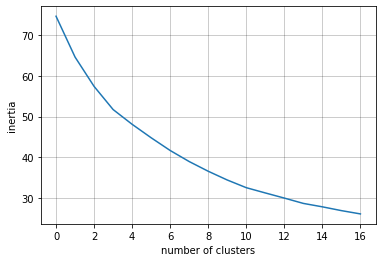

In [ ]:
plt.plot(inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

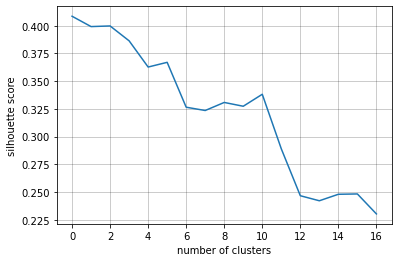

In [ ]:
plt.plot(silhouettes)
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)
plt.show()

Entendemos que un modelo de 6 clusters es una buena opción ya que logra tener una inercia baja y ademas es un mínimo local de la métrica de la silueta.

In [ ]:
kmeans = KMeans(n_clusters=6, max_iter=500, algorithm='elkan') 
kmeans.fit(data_PCA)

KMeans(algorithm='elkan', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.inertia_

51.721902527274075

In [ ]:
cluster = []
for instance in data_PCA:

  cluster += [kmeans.predict(instance.reshape(-1, len(instance)))]

df_data_PCA['Prediction'] = cluster

In [ ]:
df_clientes['Cluster'] = [i[0] for i in df_data_PCA['Prediction'].values]

### Visualizacion y Analisis del modelo

Visualizamos los clusters segun la descomposición PCA 6

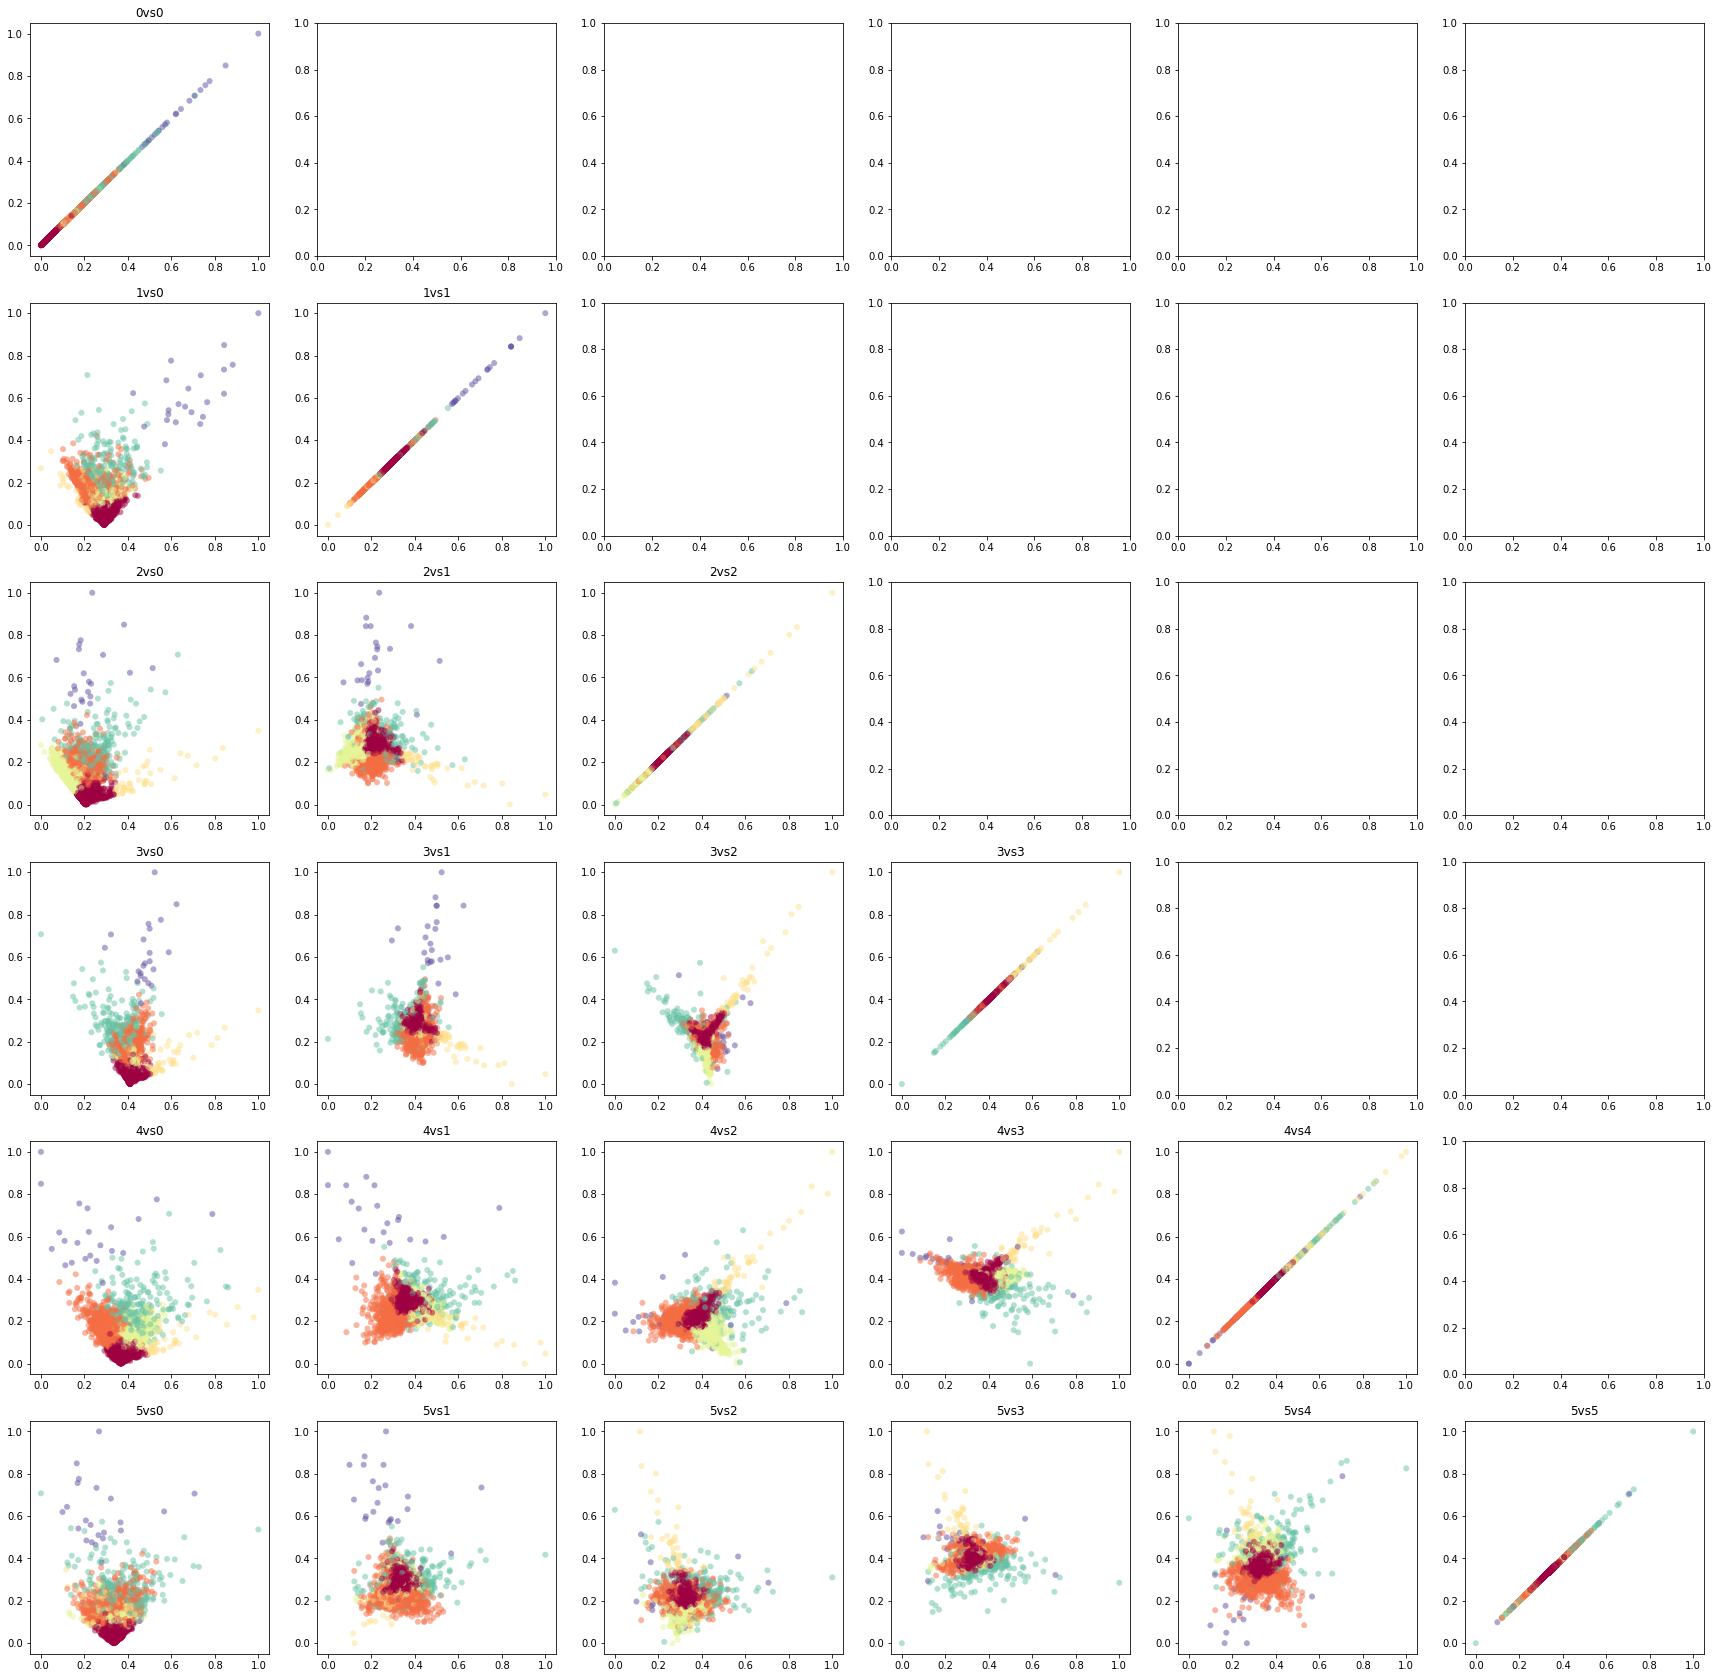

In [ ]:
features = [i for i in range(6)]

f, ax = plt.subplots(6,6, figsize=(30,30))

for j in range(6):
  for i in range(6):
    if i <= j :
      a = ax[j][i]
      a.scatter(df_data_PCA[j], df_data_PCA[i], c=df_data_PCA['Prediction'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))
      a.set_title(str(j)+'vs'+str(i))

In [ ]:
components = 2
pca = PCA(n_components=components)
pca.fit(df_clientes.values)
data_PCA_2comp = pca.transform(df_clientes.values)

scaler = MinMaxScaler()
data_PCA_2comp = scaler.fit_transform(data_PCA_2comp)

Realizamos PCA 2 para visualizar los clusters

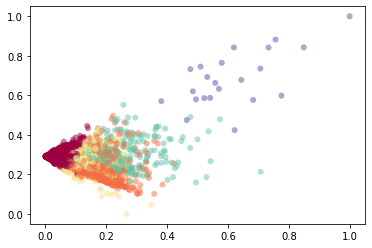

In [ ]:
plt.scatter(data_PCA_2comp[:,0], data_PCA_2comp[:,1], c=df_data_PCA['Prediction'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))

In [ ]:
components = 3
pca = PCA(n_components=components)
pca.fit(df_clientes.values)
data_PCA_3comp = pca.transform(df_clientes.values)

scaler = MinMaxScaler()
data_PCA_3comp = scaler.fit_transform(data_PCA_3comp)

Realizamos PCA 3 para visualizar los clusters

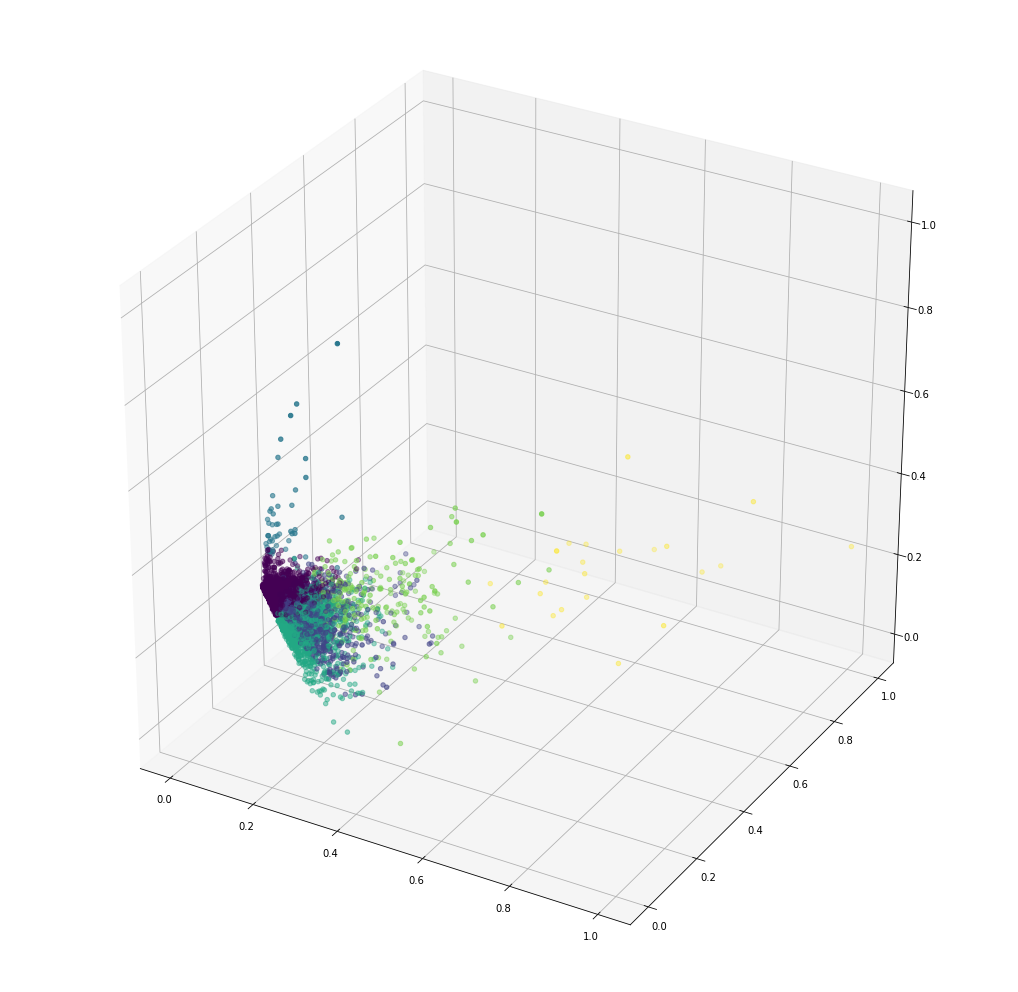

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(18,18))
ax = plt.axes(projection='3d')

ax.scatter3D(data_PCA_3comp[:,0], data_PCA_3comp[:,1], data_PCA_3comp[:,2], c=df_data_PCA['Prediction'], cmap='viridis');

In [ ]:
data_PCA_3comp_df = pd.DataFrame(data_PCA_3comp)
data_PCA_3comp_df['Cluster'] = [i[0] for i in df_data_PCA['Prediction'].values]
data_PCA_3comp_df

0         1         2  Cluster
0     0.009074  0.287488  0.201137        0
1     0.137217  0.237047  0.232581        1
2     0.097325  0.246342  0.161480        3
3     0.017921  0.284834  0.206276        0
4     0.045903  0.286608  0.230186        0
...        ...       ...       ...      ...
8631  0.002054  0.289514  0.203630        0
8632  0.010873  0.290422  0.200475        0
8633  0.008267  0.287404  0.199790        0
8634  0.002026  0.289014  0.204033        0
8635  0.019804  0.296896  0.198233        0

[8636 rows x 4 columns]

In [ ]:
df = px.data.iris()
fig = px.scatter_3d(data_PCA_3comp_df, x=0, y=1, z=2,
              color='Cluster')
fig.show()

### Analisis y Entendimiento de los clusters

Visualizamos la distribución de los clusters segun los distinos features

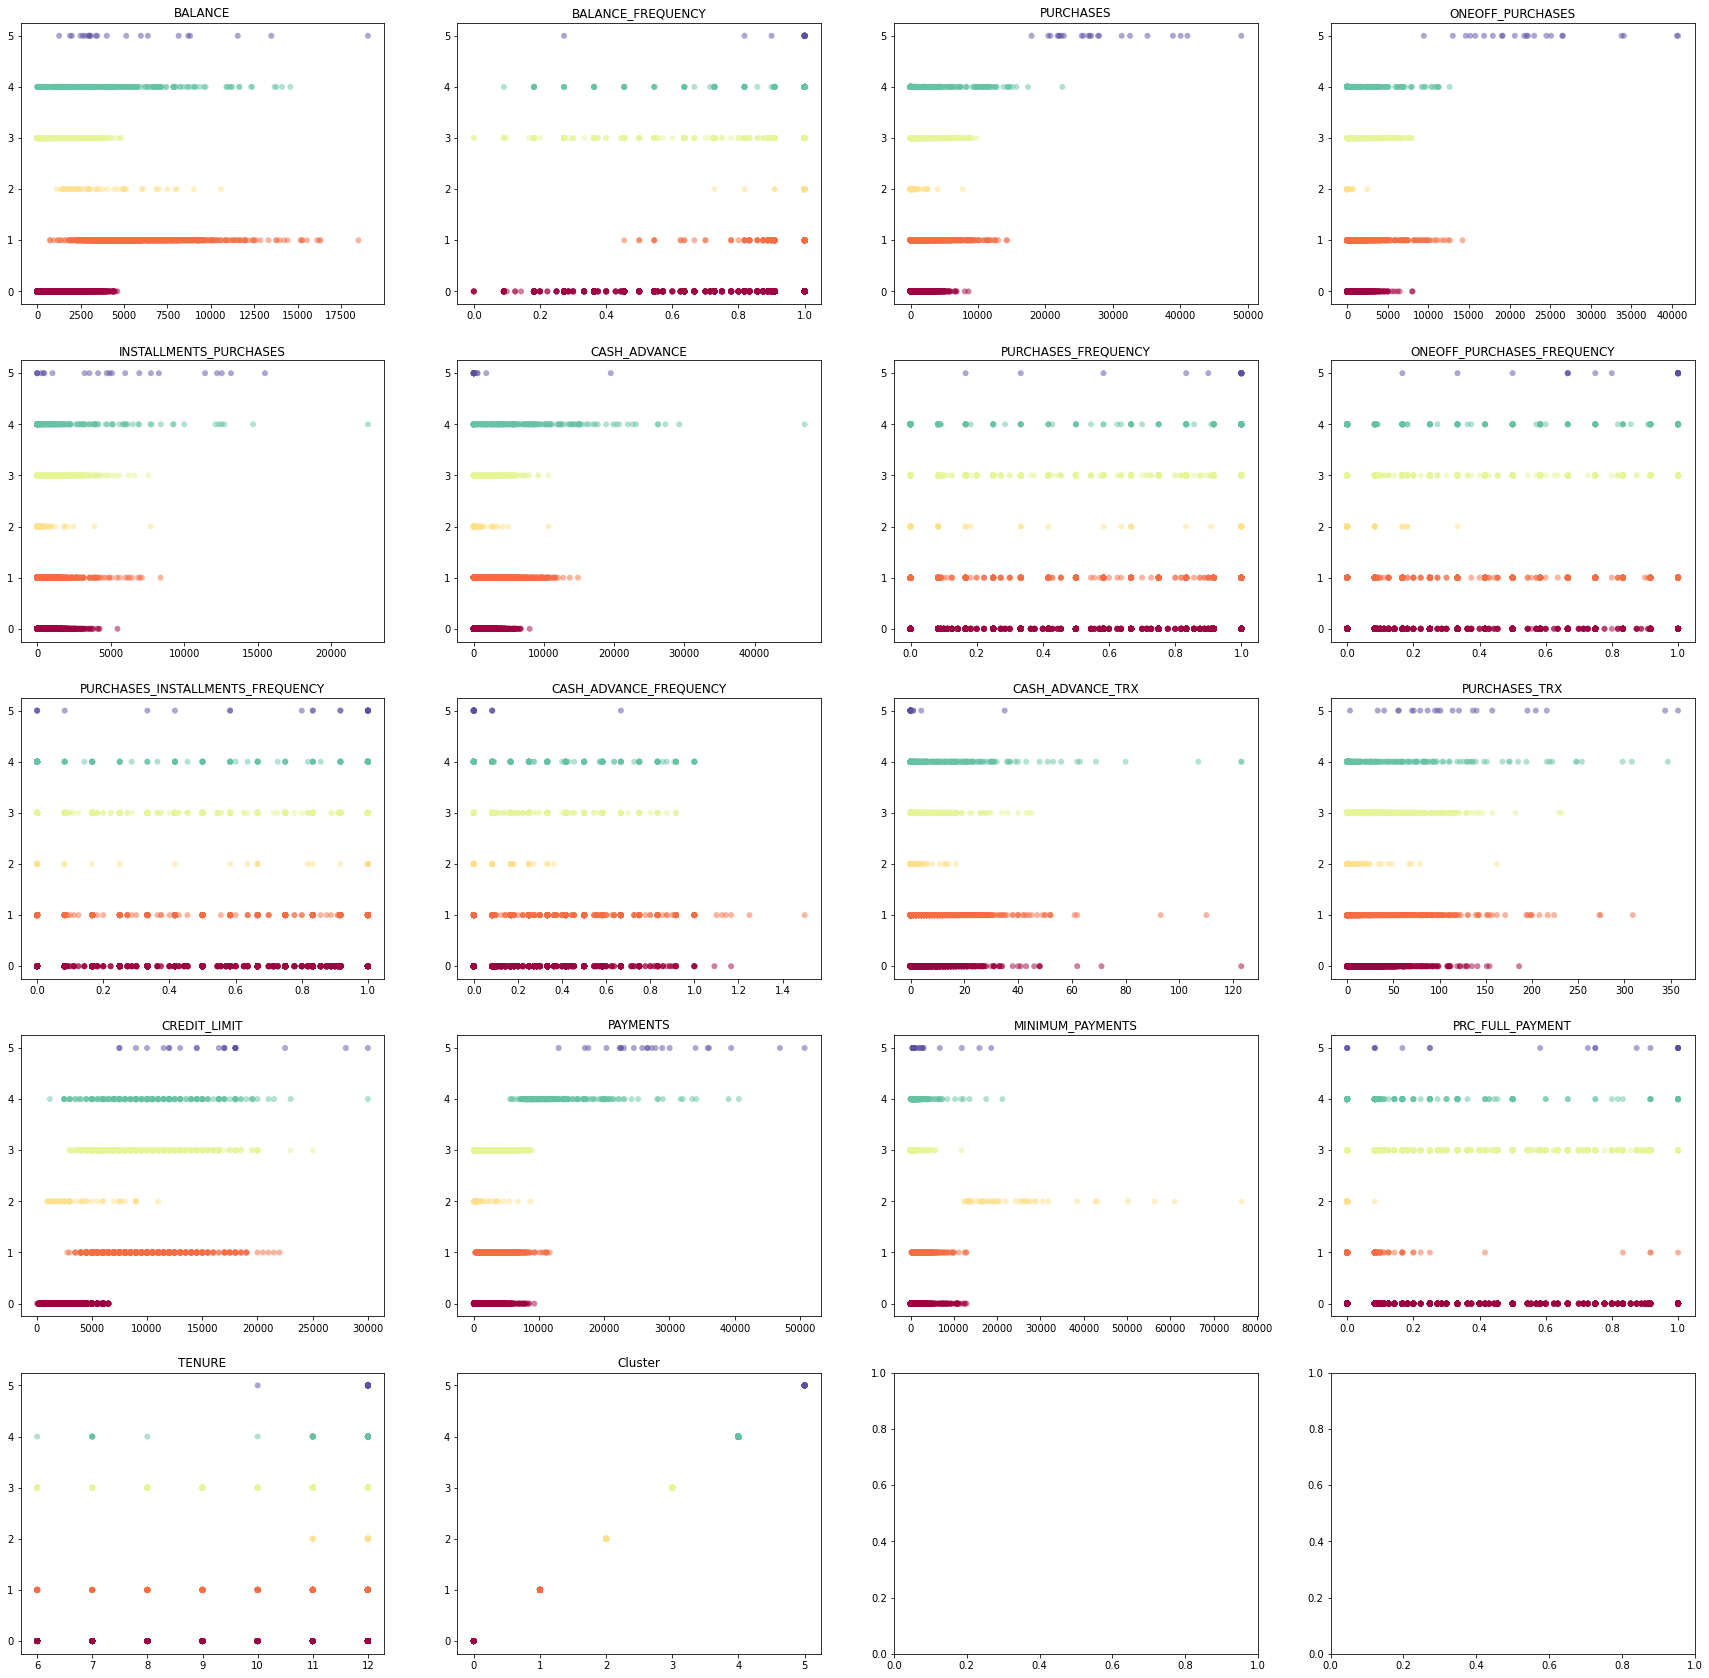

In [ ]:
features = df_clientes.columns.values

f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      
      a.scatter(df_clientes[features[i]], df_clientes['Cluster'], c=df_clientes['Cluster'], edgecolor='none', alpha=0.5,
              cmap=plt.cm.get_cmap('Spectral', 6))
      a.set_title(features[i])
      i += 1

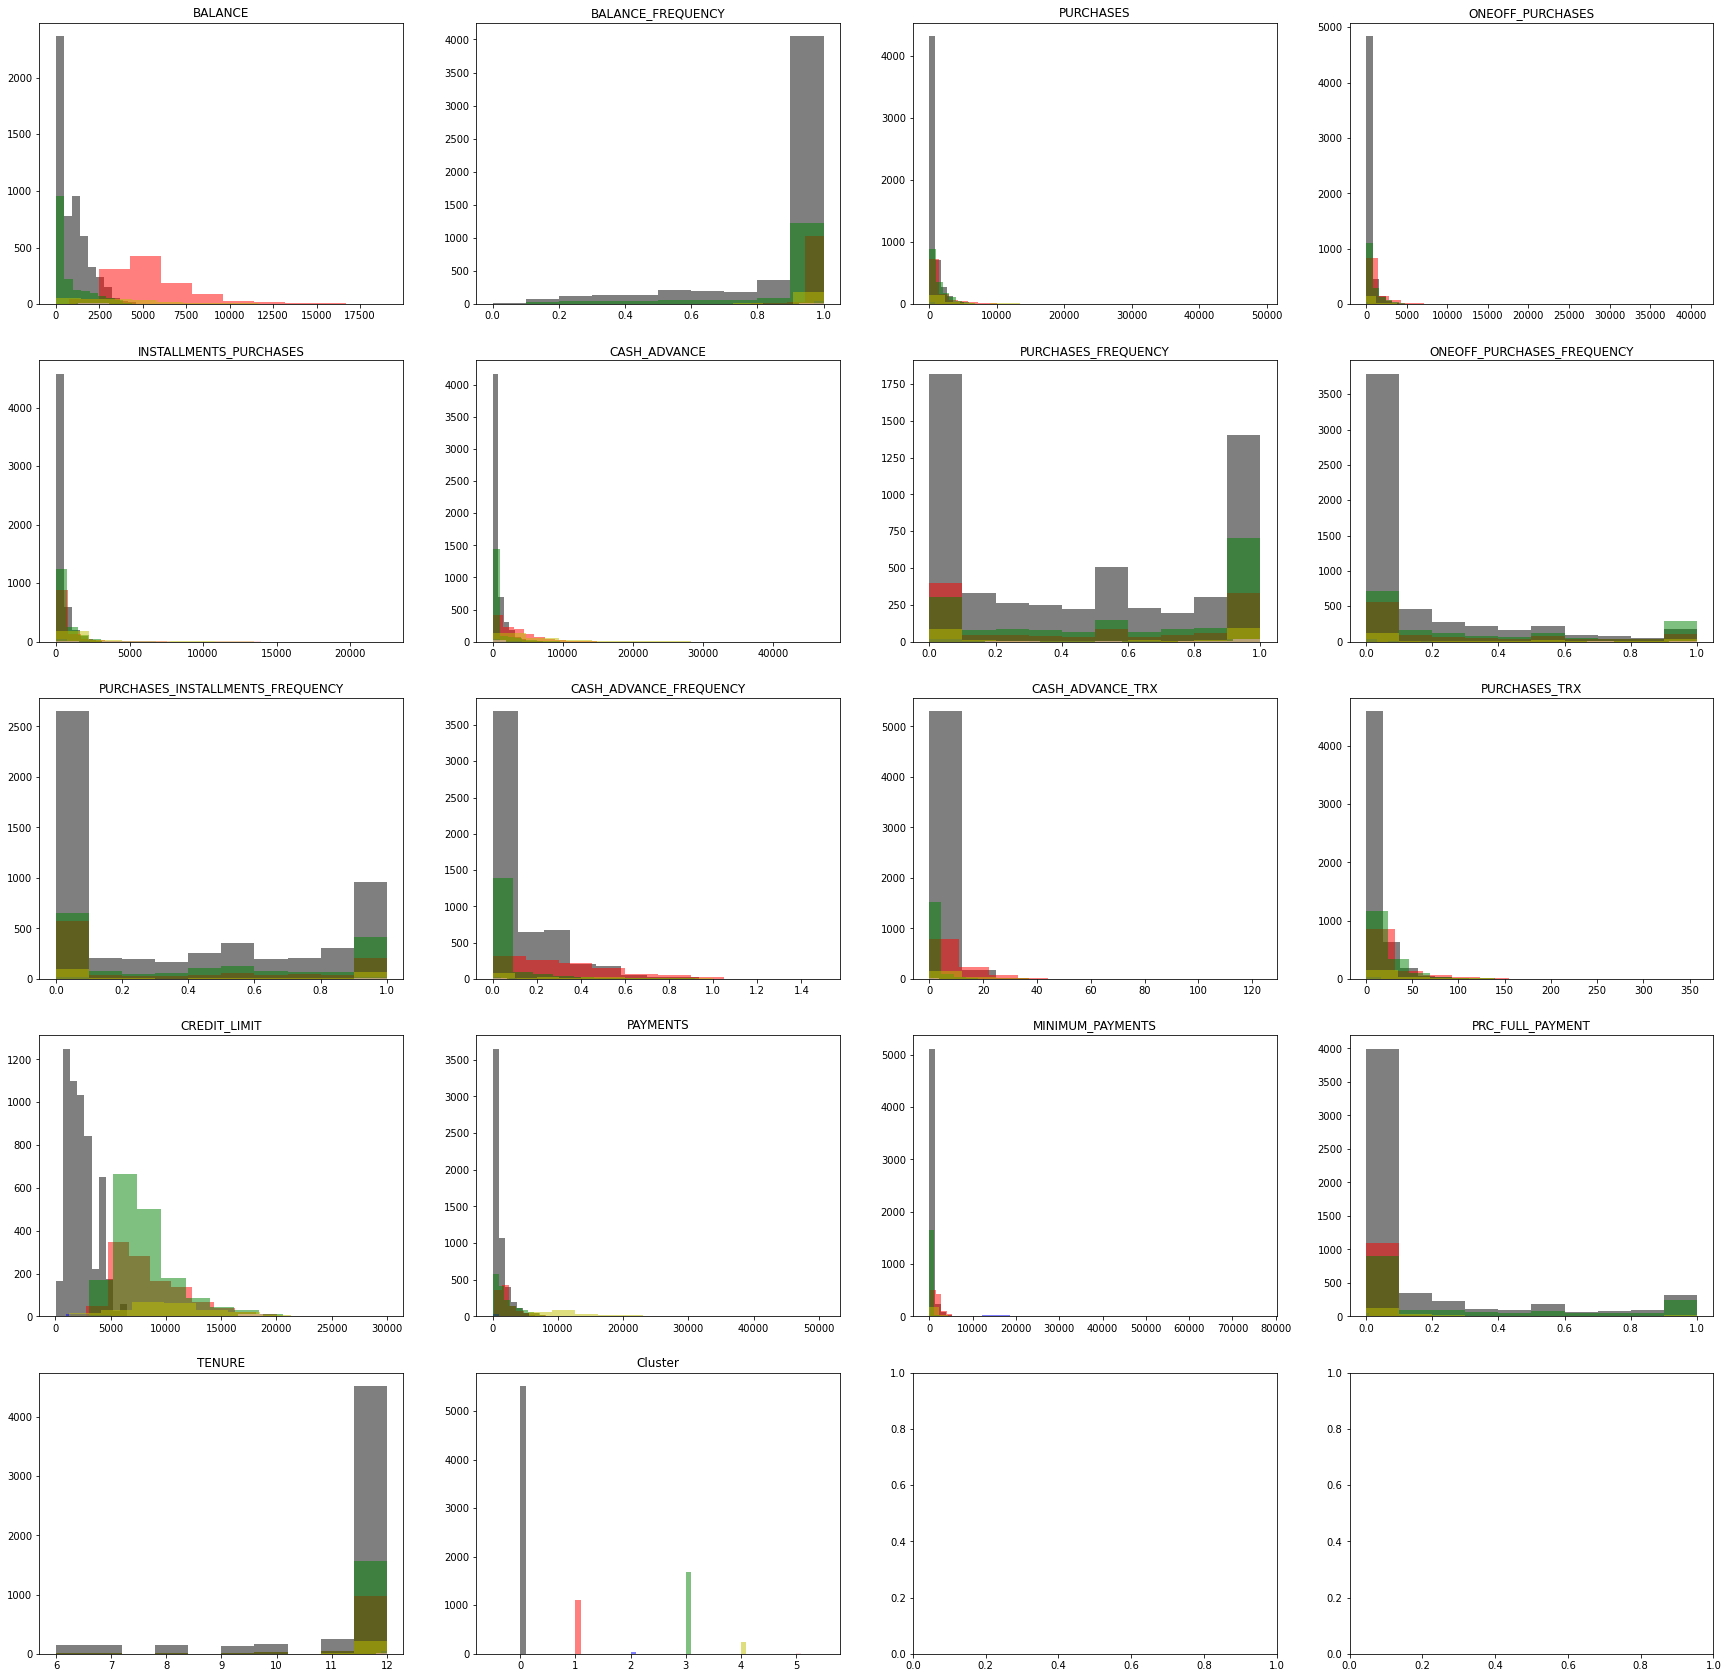

In [ ]:
features = df_clientes.columns.values
c = ['k','r','b','g','y', 'pink']
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      for k in range(6):
        data = df_clientes[features[i]].where(df_clientes['Cluster'] == k)
        a.hist(data, alpha=0.5, color=c[k], label='{}' .format(k))

      a.set_title(features[i])
      i += 1

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray

/

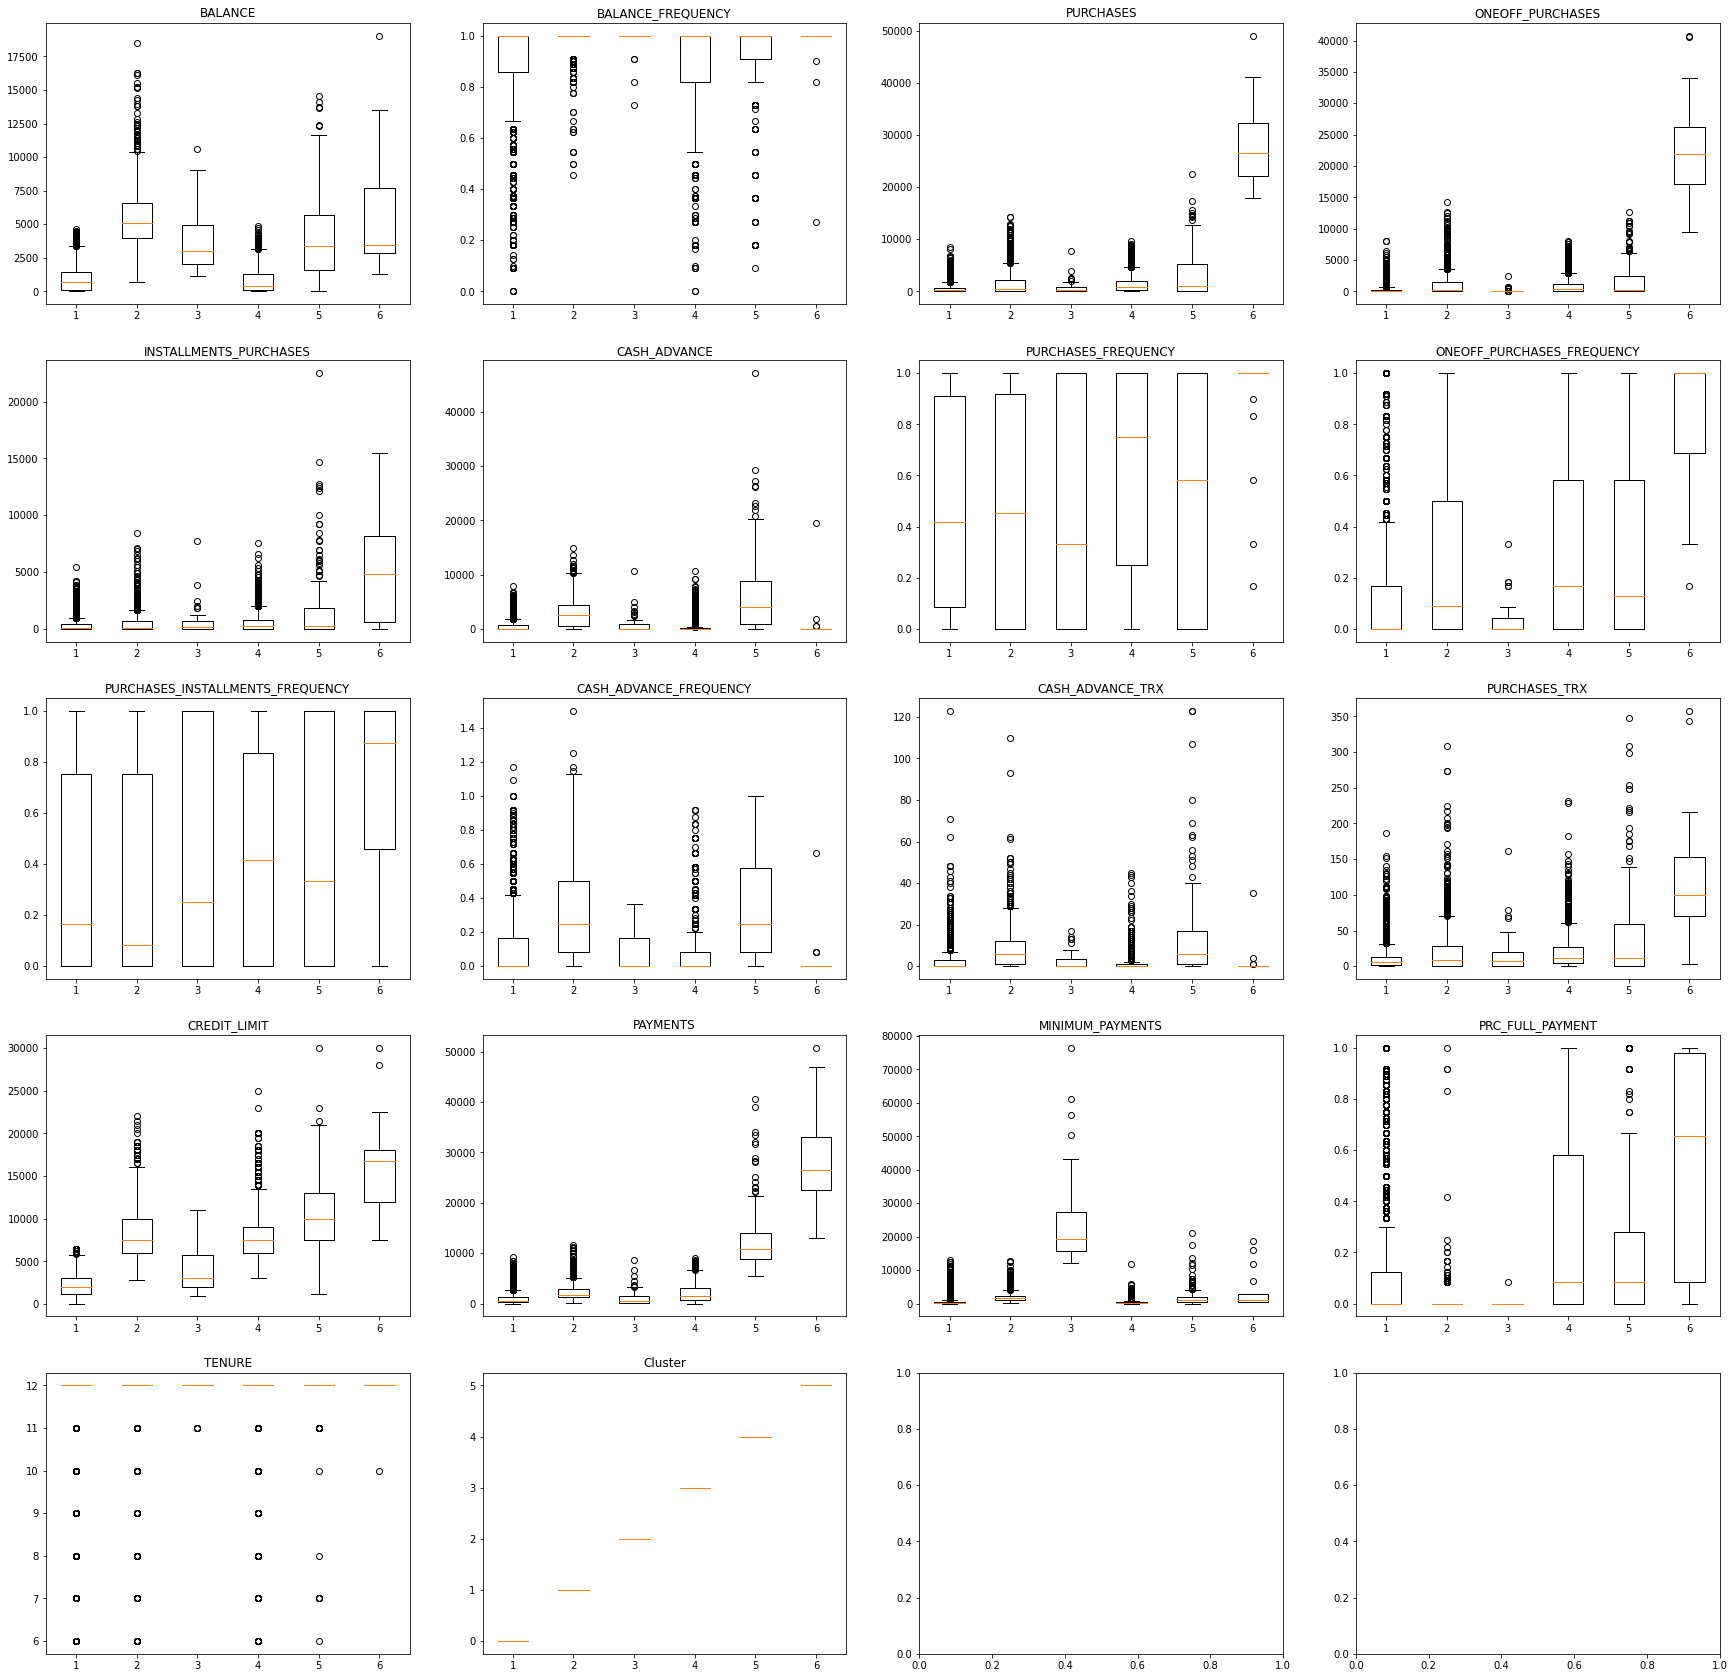

In [ ]:
features = df_clientes.columns.values
c = ['k','r','b','g','y', 'pink']
f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      # for k in range(6):
      data = [(df_clientes[features[i]].where(df_clientes['Cluster'] == k).dropna()) for k in range(6)]
      a.boxplot(data)

      a.set_title(features[i])
      i += 1

Agrupamos los datos según cluster y trabajamos con las medias para entender el significado de los clusters.

Si no se hubiese trabajado con una descomposición PCA para entrenar el modelo, esto se podría hacer con los centroides.

Sin embargo, trabajar con la distribución de los datos siempre es mejor porque aporta un panorama más real, independientemente de lo bueno que haya agrupado el modelo y puede permitir tener un mayor insight en caso de querer conocer la distribución de los puntos de ese cluster y no solamente un centroide o una media.

In [ ]:
df_means = df_clientes.groupby(by='Cluster').mean()
df_means['MINIMUM_PAYMENTS_PRCT'] = df_means['MINIMUM_PAYMENTS']  / df_means['PAYMENTS'] 
df_clientes.groupby(by='Cluster').count()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
Cluster                              ...                          
0           5518               5518  ...              5518    5518
1           1118               1118  ...              1118    1118
2             47                 47  ...                47      47
3           1695               1695  ...              1695    1695
4            236                236  ...               236     236
5             22                 22  ...                22      22

[6 rows x 17 columns]

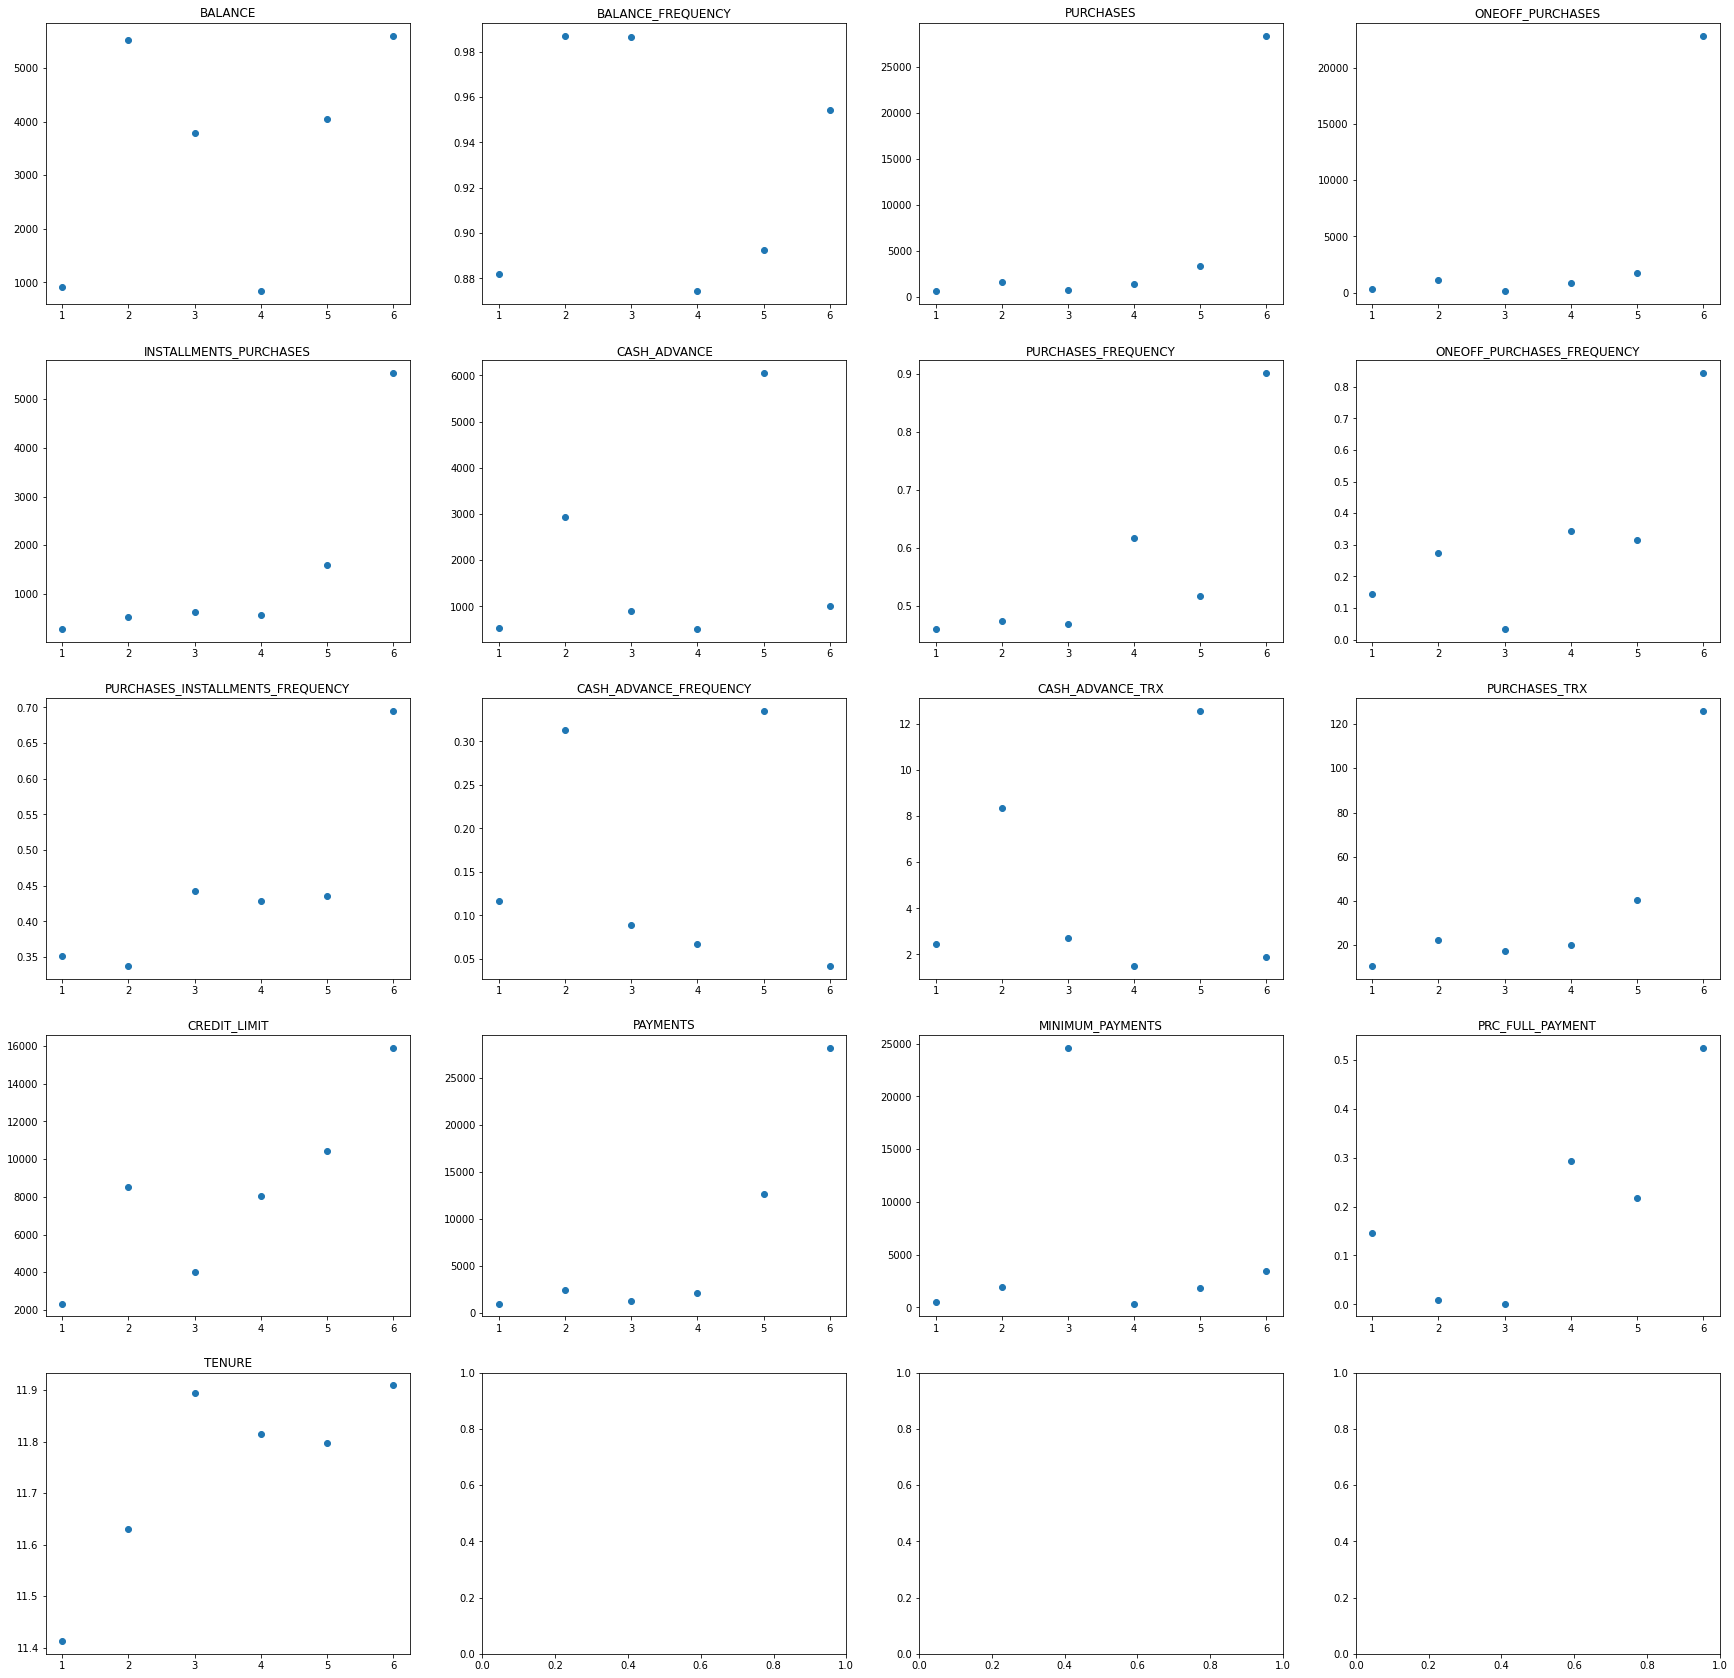

In [ ]:
features = df_clientes.columns.values[:-1]

f, ax = plt.subplots(5,4, figsize=(30,30))
i = 0
for j in range(5):
  for a in ax[j]:
    if i < len(features) :
      # for k in range(6):

      a.scatter(df_means.index.values+1, df_means[features[i]])

      a.set_title(features[i])
      i += 1

In [ ]:
df_means

BALANCE  BALANCE_FREQUENCY  ...     TENURE  MINIMUM_PAYMENTS_PRCT
Cluster                                  ...                                  
0         904.052293           0.881870  ...  11.413193               0.549276
1        5520.741386           0.987074  ...  11.630590               0.816805
2        3779.109663           0.986460  ...  11.893617              18.978750
3         831.383720           0.874257  ...  11.814159               0.168168
4        4056.690717           0.892342  ...  11.796610               0.146131
5        5601.644631           0.954132  ...  11.909091               0.123480

[6 rows x 18 columns]

#### Identificación de los Clusters

Tarjeta Platinium Para clientes del cluster 5. Ya que estos clientes son los que:
*   De los de mayor balance
*   Son lo que mas compras hacen
*   Son los que gastan mas plata
*   Son los que hacen compras mas caras
*   Son los que hacen mas transacciones
*   Mayor limite de credito
*   Menor tasa de pagos minimos

Tarjeta Platinium Para clientes del cluster 4.
*   Tiene un balance de medio para arriba
*   Comrpa bastantes y compra productos relativamente costosos
*   Es buen pagador

Tarjeta Internet Global Para clientes del cluster 1, 2 y 3:
*   Alta purchase Frequency
*   Casi la mitad de las compras en cuotas
*   Altos montos de compra 

Observaciones: Los que forman parte del Cluster 2 hacen compras mas caras, paraecen tener buen poder adquisitivo y son buenos pagadores aunque piden adelantos usualmente. 
Los que forman parte del Cluster 3 parecieran tener menores montos de balances que los del Cluster 4 pero al parecer son mejores pagadores que el anterior.

### Resultados: Clientes a Llamar

In [ ]:
df_clientes_cid['Cluster'] = [i[0] for i in df_data_PCA['Prediction'].values]
df_clientes_cid['CUST_ID']

0       C10001
1       C10002
2       C10003
4       C10005
5       C10006
         ...  
8943    C19184
8945    C19186
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8636, dtype: object

In [ ]:
df_contactos['CUST_ID']

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [ ]:
df_clientes_cid = pd.merge(
    df_clientes_cid,
    df_contactos,
    how="inner",
    on="CUST_ID",

    left_index=False,
    right_index=False,
    copy=True,
    validate='one_to_one',
)

In [ ]:
df_clientes_cid = df_clientes_cid.where(df_clientes_cid['CONTACTS'] < 2).dropna()
df_clientes_cid

CUST_ID      BALANCE  ...            PHONE  CONTACTS
3     C10005   817.714335  ...  +1 207-523-0823       0.0
4     C10006  1809.828751  ...  +1 207-765-8240       0.0
5     C10007   627.260806  ...  +1 507-257-4838       1.0
6     C10008  1823.652743  ...  +1 279-798-5201       0.0
9     C10011  1293.124939  ...  +1 225-668-7081       0.0
...      ...          ...  ...              ...       ...
8622  C19174   735.652303  ...  +1 236-401-5394       1.0
8623  C19175    20.260716  ...  +1 236-340-4346       0.0
8629  C19182  5967.475270  ...  +1 204-930-6179       0.0
8633  C19188    23.398673  ...  +1 506-873-0543       1.0
8635  C19190   372.708075  ...  +1 343-965-6104       1.0

[4396 rows x 21 columns]

#### Clientes Platinium

In [ ]:
tarjeta_platinium = df_clientes_cid[(df_clientes_cid.Cluster == 4) | (df_clientes_cid.Cluster == 5)].dropna()
tarjeta_platinium['PHONE']

22      +1 253-608-0202
91      +1 301-687-2742
97      +1 317-657-2585
117     +1 213-982-5026
139     +1 214-880-7168
             ...       
7046    +1 343-320-8694
7424    +1 249-488-5175
7444    +1 236-586-1083
7565    +1 416-581-9454
8039    +1 249-476-3438
Name: PHONE, Length: 126, dtype: object

Aca se brinda la lista de los usuarios a los que se le va a recomendar la Tarjeta Platinium, mostrando el CUSTID y PHONE.

#### Clientes Global

In [ ]:
tarjeta_global = df_clientes_cid[(df_clientes_cid.Cluster == 1) | (df_clientes_cid.Cluster == 2) | (df_clientes_cid.Cluster == 3)].dropna()
tarjeta_global['PHONE']

5       +1 507-257-4838
14      +1 501-793-2033
23      +1 351-628-6227
27      +1 224-645-6636
29      +1 210-882-5879
             ...       
8390    +1 204-807-1327
8406    +1 403-852-6657
8423    +1 506-628-4070
8506    +1 250-711-0252
8629    +1 204-930-6179
Name: PHONE, Length: 1462, dtype: object

Aca se brinda la lista de los usuarios a los que se le va a recomendar la Tarjeta Internet Global, mostrando el CUSTID y PHONE.

## PARTE 4

En sus propias palabras, describa las técnicas de clustering basadas en densidad, en particular el algoritmo DBSCAN. Aplique DBSCAN al dataset y compare los resultados con los obtenidos en la parte 3.

### Marco teórico

Density-based spatial clustering of applications with noise (DBSCAN) es un algoritmo de clusterización basado en densidad. Fue propuesto por Martin Ester, Hans-Peter Kriegel, Jörg Sander y Xiaowei Xu en 1996.

Para clusterizar (lograr el agrupamiento de conjuntos de objetos no etiquetados, para lograr construir subconjuntos de datos conocidos como Clusters), DBSCAN clasifica a los puntos de la siguiente manera:

1.   Puntos "core" o  núcleo: son los puntos interiores de un cluster, cuando tienen, por lo menos, un número mínimo de puntos a una distancia 'eps' de p puntos (min_samples).
2.   Puntos "border" (frontera): tienen menos de min_samples a una distancia eps de p, y están en el vecindario de algún punto core.
3.   Puntos noise (ruido): cualquier punto que no forma parte de un cluster core ni del border

Si p es un punto "core" o núcleo, este forma un cluster junto a otros puntos (core o no) que sean alcanzables desde él. Cada cluster contiene al menos un punto núcleo. Los puntos no núcleos alcanzables pueden pertenecer a un cluster pero actúan como una barrera puesto que no es posible alcanzar más puntos desde estos.

La relación de ser alcanzable no es simétrica. Por definición, ningún punto puede ser alcanzable desde un punto que no sea núcleo, sin importar la distancia a la que se encuentre, es decir, un punto que no sea núcleo puede ser alcanzable pero nada puede ser alcanzado desde este. Por lo tanto la noción de connectividad es necesaria para definir formalmente la extensión de un cluster dada por DBSCAN. Dos puntos p y q están conectados densamente si existe un punto o tal que ambos p y q sean directamente alcanzables desde o. La relación estar densamente conectado es simétrica.

Un clúster, satisface por lo tanto dos propiedades:

*  Todos los puntos del clúster están densamente conectados entre sí.
*  Si un punto A es densamente alcanzable desde cualquier otro punto B del clúster, entonces A también forma parte del clúster.

DBSCAN requiere dos parámetros: eps y el número mínimo de puntos requeridos para que una región se considere densa 5​ min_samples. El algoritmo comienza por un punto arbitrario que no haya sido visitado. La vecindad de este punto es visitada, y si contiene suficientes puntos, se inicia un clúster sobre el mismo. De lo contrario, el punto es etiquetado como ruido. El punto en cuestión puede pertenecer a otra vecindad que lo incluya en el clúster correspondiente.

Si un punto se incluye en la parte densa de un clúster, su vecindad también forma parte del clúster. Así, todos los puntos de dicha vecindad se añaden al clúster, al igual que las vecindades de estos puntos que sean lo suficientemente densas. Este proceso continúa hasta construir completamente un clúster densamente conectado. Entonces, un nuevo punto no visitado se visita y procesa con el objetivo de descubrir otro clúster o ruido.

### Implementación

In [ ]:
df_clientes_dbscan = df_clientes.drop(axis=1, labels='Cluster')
data = df_clientes_dbscan.values 

In [ ]:
scaler = MinMaxScaler()
data_dbscan = scaler.fit_transform(data)

Realizamos un primer modelo asignando valores arbitrarios a los hiperparametros

In [ ]:
clustering = DBSCAN(eps=0.5, min_samples=5).fit(data_dbscan)
labels = clustering.labels_

In [ ]:
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 2
Estimated no. of noise points: 51


In [ ]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_dbscan, labels))

Silhouette Coefficient: 0.347


Luego, utilizamos una heuristica para encontrar el eps que mejor se ajusta al problema. Esta se basa en aplicar KNN al set de datos y encontrar la media de las distancias entre los pares de puntos.

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_dbscan)
distances, indices = nbrs.kneighbors(data_dbscan)

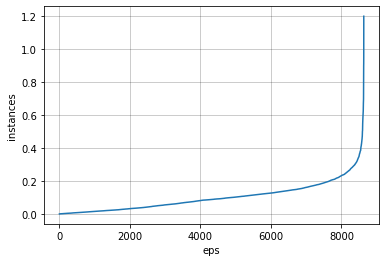

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('eps')
plt.ylabel('instances')
plt.grid(color='k', linestyle='-', linewidth=0.5, alpha=0.4)

El punto de mayor curvatura debería ser el vaolr del eps que mejor se adapta al problema.

In [ ]:
clustering = DBSCAN(eps=0.25, min_samples=10, p=4).fit(data_dbscan)
labels = clustering.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data_dbscan, labels))

Estimated no. of clusters: 4
Estimated no. of noise points: 857
Silhouette Coefficient: 0.043


In [ ]:
components = 2
pca = PCA(n_components=components)
pca.fit(df_clientes_dbscan.values)
data_PCA_2comp = pca.transform(df_clientes_dbscan.values)

scaler = MinMaxScaler()
data_PCA_2comp = scaler.fit_transform(data_PCA_2comp)

In [ ]:
data_PCA_2comp_df = pd.DataFrame(data_PCA_2comp)
data_PCA_2comp_df['Cluster'] = labels
data_PCA_2comp_df.groupby(by='Cluster').count().head()

0     1
Cluster            
-1        857   857
 0       7759  7759
 1          9     9
 2         11    11

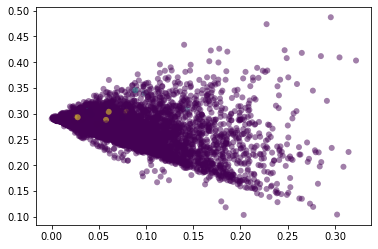

In [ ]:

data_PCA_2comp_df = data_PCA_2comp_df[(data_PCA_2comp_df.Cluster >= 0)].dropna()

plt.scatter(data_PCA_2comp_df[0], data_PCA_2comp_df[1], c=data_PCA_2comp_df['Cluster'], edgecolor='none', alpha=0.5,
              cmap='viridis')

In [ ]:
components = 3
pca = PCA(n_components=components)
pca.fit(df_clientes_dbscan.values)
data_PCA_3comp = pca.transform(df_clientes_dbscan.values)

scaler = MinMaxScaler()
data_PCA_3comp = scaler.fit_transform(data_PCA_3comp)

In [ ]:
data_PCA_3comp_df = pd.DataFrame(data_PCA_3comp)
data_PCA_3comp_df['Cluster'] = labels
data_PCA_3comp_df = data_PCA_3comp_df[(data_PCA_3comp_df.Cluster >= 0)].dropna()
data_PCA_3comp_df

0         1         2  Cluster
0     0.009074  0.287488  0.201137        0
1     0.137217  0.237047  0.232581        0
2     0.097325  0.246342  0.161480        0
3     0.017921  0.284834  0.206276        0
4     0.045903  0.286608  0.230186        0
...        ...       ...       ...      ...
8627  0.017005  0.291494  0.203182        0
8628  0.014229  0.293573  0.201613        0
8630  0.008271  0.287115  0.200011        0
8631  0.002054  0.289514  0.203630        0
8632  0.010873  0.290422  0.200475        0

[7779 rows x 4 columns]

In [ ]:

df = px.data.iris()
fig = px.scatter_3d(data_PCA_3comp_df, x=0, y=1, z=2,
              color='Cluster')
fig.show()

Si bien las métricas del modelo no son malas, la clusterización no es buena. La mayoría de los puntos quedan en un solo cluster, haciendo imposible la tarea de identificar segmentos de clientes en los distintos clusters.

Se trabajo mucho con el modelo y distitnos hiperparametros para encontrar cluster con distribuciones mejores (en particular variando el 'eps' y el 'min_samples', aunque se variaron la mayoría de ellos), pero no se logro realizar un mejor modelo.


De todas formas, podriamos plantear a futuro como posible mejora, realizar este modelos sin considerar los outliers.

## PARTE 5

Estudie y explique el método de Ward utilizado en clustering aglomerativo, en particular, la implementación de sklearn.

### Método de Ward

Es un criterio aplicado al Análisis de clúster jerárquico.

El método de Ward de varianza mínima es un caso especial del enfoque de función objetivo presentado originalmente por Joe H. Ward, Jr., el cual se trata de un procedimiento general donde el criterio para la elección del par de clusters a mezclar en cada paso se basa en el valor óptimo de una función objetivo. 

Esta función objetivo podría ser "cualquier función que refleje el propósito del investigador".

### Criterio de varianza mínima

Criterio de Varianza Mínima de Ward minimiza el total dentro de la varianza del clúster. En cada paso el par de clúster con distancia mínima entre ellos son mezclados. 

Para implementar este método, en cada paso se debe encontrar el par de clúster que llevan al incremento mínimo del total de la varianza del clúster después de mezclarlos. Este incremento es la distancia cuadrada con un peso asignado entre los centros de los clúster. En el paso inicial, todos los clúster contienen un punto único (solitario). 

Para aplicar algoritmo recursivo bajo esta función objetivo, la distancia inicial entre los objetos individuales debe ser proporcional al cuadrado de la Distancia Euclidiana.



### Implementación en Sklearn

Agrupación jerárquica de clusters: construye un árbol y lo corta.

Recursivamente fusiona el par de clusters que aumenta mínimamente la varianza dentro del cluster.

### Parametros

n_clusters (int o ndarray): El número de clusters a encontrar

connectivity (sparse matrix, opcional): Define para cada muestra las muestras vecinas siguiendo una estructura dada de los datos. El valor predeterminado es None

memory (Instance of joblib.Memory or string, optional): 
Se utiliza para almacenar en caché la salida del cálculo del árbol. De forma predeterminada, no se realiza el almacenamiento en caché. Si se proporciona un path, es la ruta al directorio de almacenamiento en caché.

n_components (int, opcional): El número de componentes conectados en el gráfico definido por la matriz de conectividad. Si no se establece, se estima.

compute_full_tree (bool, opcional): Detenga antes la construcción del árbol en n_clusters. Esto es útil para reducir el tiempo de cálculo si el número de clusters no es pequeño en comparación con el número de muestras. Esta opción es útil solo cuando se especifica una matriz de conectividad. Tenga en cuenta también que al variar el número de clusters y utilizar el almacenamiento en caché, puede resultar ventajoso calcular el árbol completo.



## PARTE 6

Planificando próximas etapas, el banco requiere armar un cuestionario para nuevos clientes, de forma de poder ofrecer el producto a usuarios de los cuales no cuenta con histórico transaccional. Para esto, el Departamento Comercial solicita que se construya, a partir del análisis de datos, el listado de preguntas y un modelo predictivo que en función de las respuestas retorne la propensión de compra de los productos.
En caso de que entienda que no es posible cumplir con alguno de estos requerimientos, documente los motivos que lo llevaron a tomar esa conclusión.

Para esta parte vamos a implementar un modelo de regresión logística.

In [ ]:
df_clientes

BALANCE  BALANCE_FREQUENCY  ...  TENURE  Cluster
0       40.900749           0.818182  ...    12.0        0
1     3202.467416           0.909091  ...    12.0        1
2     2495.148862           1.000000  ...    12.0        3
4      817.714335           1.000000  ...    12.0        0
5     1809.828751           1.000000  ...    12.0        0
...           ...                ...  ...     ...      ...
8943     5.871712           0.500000  ...     6.0        0
8945    28.493517           1.000000  ...     6.0        0
8947    23.398673           0.833333  ...     6.0        0
8948    13.457564           0.833333  ...     6.0        0
8949   372.708075           0.666667  ...     6.0        0

[8636 rows x 18 columns]

In [ ]:
def recluster(x):
  if x.Cluster == 0:
     return 0 
  elif (x.Cluster == 4 or  x.Cluster == 5): 
    return 1 
  else:
    return 2
df_clientes['Recluster'] = df_clientes.apply(lambda row : recluster(row), axis=1)

Dependiendo en cual Cluster habían quedado agrupadas las instancias vamos a clisificarlos en 3: 0 si estaban en el Cluster 0, 1 si estaban en el 4 o 5 y 2 para los que habían quedado en el resto.

De esta forma nos quedan bien separados nuestros clientes objetivo. Si estaba en el cluster 0, no le recomiendo nada, si estaba en el 4 o 5 le recomiendo la tarjeta Platinium y para el resto le recomiendo la tarjeta Internet Global.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df_clientes)
data = pd.DataFrame(data, columns=df_clientes.columns.values)
data

BALANCE  BALANCE_FREQUENCY  PURCHASES  ...  TENURE  Cluster  Recluster
0     0.002148           0.818182   0.001945  ...     1.0      0.0        0.0
1     0.168169           0.909091   0.000000  ...     1.0      0.2        1.0
2     0.131026           1.000000   0.015766  ...     1.0      0.6        1.0
3     0.042940           1.000000   0.000326  ...     1.0      0.0        0.0
4     0.095038           1.000000   0.027188  ...     1.0      0.0        0.0
...        ...                ...        ...  ...     ...      ...        ...
8631  0.000308           0.500000   0.000426  ...     0.0      0.0        0.0
8632  0.001496           1.000000   0.005936  ...     0.0      0.0        0.0
8633  0.001229           0.833333   0.002945  ...     0.0      0.0        0.0
8634  0.000707           0.833333   0.000000  ...     0.0      0.0        0.0
8635  0.019572           0.666667   0.022293  ...     0.0      0.0        0.0

[8636 rows x 19 columns]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

def get_scores(Y_pred, probs, Y_test, plot=True):

  # Recall, Precision, Accuracy, F1
  # AUC
  
  accuracy = accuracy_score(Y_test, Y_pred)
  
  # mat = confusion_matrix(Y_test, Y_pred)

  print (classification_report(Y_test,Y_pred))

  return accuracy

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data, test_size=0.2)

X_train = df_train.drop(axis=1, labels='Cluster').drop(axis=1, labels='Recluster')
Y_train = df_train['Recluster']*2

X_test = df_test.drop(axis=1, labels='Cluster').drop(axis=1, labels='Recluster')
Y_test = df_test['Recluster']*2

In [ ]:
np.unique(Y_train), np.unique(Y_test) 

(array([0., 1., 2.]), array([0., 1., 2.]))

In [ ]:
def predict_Y_from_proba(proba):
  preds = []
  for prediction in proba:
    for i in range(len(prediction)):
      if prediction[i] == max(prediction):
        preds += [i]
        break
  return preds

### Modelo Predictivo

Utilizamos una clasificación por un regresor para identificar los clientes de cada tipo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = LogisticRegression(max_iter=500, solver='newton-cg', class_weight='balanced')
# model.fit(X_train, Y_train);

pipe = Pipeline([('fselector', SelectKBest(chi2, k=10)), ('lr', model)])
pipe.fit(X_train, Y_train)
new_Y_pewd = pipe.predict_proba(X_test)

# new_Y_pewd = model.predict_proba(X_test)

Y_pred = predict_Y_from_proba(new_Y_pewd)
# 'Accuracy', get_scores(Y_pred, new_Y_pewd, Y_test,False

In [ ]:
'Accuracy', get_scores(Y_pred, new_Y_pewd, Y_test, False)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1080
         1.0       0.67      1.00      0.80        55
         2.0       0.92      0.92      0.92       593

    accuracy                           0.94      1728
   macro avg       0.86      0.96      0.90      1728
weighted avg       0.95      0.94      0.94      1728



('Accuracy', 0.9432870370370371)

Vemos que los resultados del modelo son muy buenos. Se identifican todos los clientes que potencialmente usarian la tarjeta Platinium y la precisión es del 67% (un poco baja pero tolerable considerando que el support de esta clase es bajo). En el caso de los clientes a los que se debe ofrecer la tarjeta global, tanto la precisión como el recall es del 92%, lo que es un buen resultado. 

In [ ]:
f_indices = pipe.named_steps['fselector'].get_support(indices=True)
f_indices

array([ 0,  2,  3,  4,  5,  7, 10, 11, 12, 13])

In [ ]:
data.columns.values[f_indices]

array(['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS'], dtype=object)

### Formulario

Para el modelo de regresión logística utilizamos el SelectKBest para quedarnos con los 10 atributos mas significativos. Estos son los siguientes: 
*   BALANCE
*   PURCHASES
*   ONEOFF_PURCHASES
*   INSTALLMENTS_PURCHASES
*   ONEOFF_PURCHASES_FREQUENCY
*   CASH_ADVANCE_TRX
*   PURCHASES_TRX
*   CREDIT_LIMIT
*   PAYMENTS

Ahora como sabemos que estos atributos son los 10 mas importantes, realizarimos las preguntas en base a esto.

Las preguntas serían:
*   ¿Cual sería el balance promedio que espera tener en su cuenta?
*   ¿Cual sería el importe de las compras realizadas? 
*   ¿Que precio supone que tendrá la compra mas grande que realizara? 
*   ¿Cual sería la cantidad de compras hechas en cuotas? 
*   ¿Qué tan frecuentemente realizara compras en un solo pago?
*   ¿Cuantas transacciones de retiro en efectivo cree que hará?
*   ¿Cuantas transacciones de compra espera hacer? 
*   ¿Que limite de crédito solicita?
*   ¿Que cantidad de pagos cree que efectuara?

\

---

\

Cada pregunta se corresponde con el atributo mencionado anteriormente de forma respectiva y en el mismo orden.

Es importante aclarar que para afinar más este cuestionario se necesitaría contar con mas información del banco para conocer las escalas y significado de las mismas para alguno de los atributos que representan ratios o valores dados por el banco. Ademas, habría que aclarar periodo y monedas de los datos, para poder realizar preguntas mas especificas (y por ende, obtener respuestas más certeras y ajustadas al modelo)

## PARTE 7

Ensaye una discusión general del trabajo realizado, haciendo los comentarios y recomendaciones que considere necesarias.

La primera actividad del trabajo fue analizar los datos y sus características. En este sentido se encontro que no había mayores problemas. Los distintos atributos tenían distribuciones particulares, pareciendose muchas de ellas a distribuciones exponenciales o complejas. Ademas, la mayoría de los atributos no presentaban altas correlaciones entre ellos.

Es importante aclarar que muchos de los clientes no podían se elegidos para ser llamados, sin embargo fueron utilizados para tener un modelo con mas informacion.

---

No obstante, habían datos que tenían campos nulos. A estas instancias se las elimino ya que no se tenía mayor información del significado de los nulos, se consideraba importante el feature donde se encontraban los nulos y representaban menos de un 5% de la muestra. A futuro, una mejora del trabajo podría ser utilizar técnicas de imputación para aproximar el valor de esos datos desconocidos (aunque esto debería ser estudiado a fondo para entender incluso si tiene sentido hacerlo).

---

Para el primer modelo de clusterizado (Kmeans), se colapsaron todos los features del dataset a dimensionalidad 6 utilizando la tecnica de PCA. Se logro representar más del 98% de la información, bajando la dimensionalidad del problema. En primer lugar, tomando un approach naive, se clusterizo en dos subsets. Este modelo no parecio lo suficientemente bueno, pero sirvio como medida de comparación. Luego se clusterizo en 6 grupos, ya que esta cantidad parecia ser la mejor opción (una baja inercia y un mínimo local en la métrica de silueta). Los resultados de esta clusterización (considerando métricas y representaciones gráficas - utilizando PCA 2, PCA 3, proyecciones en subespacios de PCA 6 y según los distintos features) parecieron lo suficientemente buenos.

Se analizó las características de cada cluster para enteder cual o cuales de ellos se adaptaban mejor a las especificaciones de cada producto. Finalmente, se listaron los clientes de dichos clusters (considerando los que podían ser contactados).

---

En el caso del cluster realizado con la tecnica de DBSCAN, las métricas del modelo no son malas. Sin embargo, la clusterización no es buena. La mayoría de los puntos quedan en un solo cluster, haciendo imposible la tarea de identificar segmentos de clientes en los distintos clusters.

Por tanto, si comparamos ambos modelos de clusterización anteriormente nombrados, no queda duda que el desempeño de Kmeans fue ampliamente superior, sin necesidad de comparar métricas o outputs de los algoritmos.

Se trabajo mucho con el modelo usando distintos hiperparametros para encontrar cluster con mejores distribuciones (en particular variando el 'eps' y el 'min_samples', aunque se variaron la mayoría de ellos), pero no se logro realizar un mejor modelo.

Entendemos que debe haber algún tipo de mejora a futuro para este modelo, aunque en esta instancia el resultado haya sido malo. Se considera como posible via de mejora, trabajar sin outliers en este modelo. De todas formas, creemos que el problema de este modelo radica en algún otro punto que no son los outliers.

---

Para el modelo predictivo a realizar, se considero oportuno la utilizacion de una regresión lineal de clasificación. Los distintos atributos no tenían altas correlaciones entre la mayoría de ellos. Ademas, se considero que un modelo simple era una buena opción para esta situación.

Los resultados obtenidos por el modelo fueron muy buenos. Se identifican todos los clientes a los que se ofrecería la tarjeta Platinium y la precisión es del 67% (un poco baja pero tolerable considerando que la cantidad de instancias de esta clase era bajo). En el caso de los clientes a los que se debe ofrecer la tarjeta global, tanto la precisión como el recall es del 92%, lo que es un buen resultado. Aquellos clientes a los que no se ofrecerían productos fueron identificados con una precisión del 98%. Ademas, el modelo tuvo en total una accuracy de 94%.

Este modelo fue realizado con las 10 features que se hallaron mas significativas para el modelo. Se considera que es un número de preguntas adecuado para el formulario del banco, obteniendose asi métricas sobresalientes. Para encontrar esos features se utiliza SelectKBest de sklearn con Chi2 como métrica. En base a estos features, se pueden elaborar preguntas para determinar a que cluster pertenecería el nuevo cliente.


Una posible mejora para esta predicción seria utilizar modelos que sean expliactivos (como por ejemplo arboles) que puedan aportar fundamentos, de forma mas clara, sobre la clasificación a los trabajadores del banco. 

---

En general consideramos que el trabajo es satisfactorio. En cuanto al clusterizado es evidente que le metodo Kmeans fue el que obtuvo mejores resultados. Si bien es muy difícil de saber a ciencia cierta, se cree que este modelo logro cumplir con su cometido de buena forma.

En cuanto al modelo de DBSCAN, es tambien de suponer que este podría ser mejorado. Ademas, una posible mejora del trabajo sería realizar otro tipo de comparación sobre los metodos de clusterizados, como puede ser comparar la listas de clientes a contactar (utilizando métricas como Jakart).

Finalmente, para la clasificación de nuevos clientes, el modelo de regresión pareció solucionar de buena forma el problema. Si bien hay algunas preguntas del formulario que pueden ser complejas de responder, en caso de obtener datos certeros de parte de los clientes, parecería que podriamos predecir el tipo de cliente de buena forma.